# Generic notebook to study calibraded  spectra for HD205905 data 8 jun 2017
==================================================================================================

- author : Sylvie Dagoret-Campagne
- affiliation : LAL/IN2P3/CNRS FRANCE
- creation date   : 10th October 2017





In [1]:
%%javascript
var kernel = IPython.notebook.kernel;
var thename = window.document.getElementById("notebook_name").innerHTML;
var command = "theNotebook = " + "'"+thename+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [41]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

print theNotebook
from IPython.display import Image, display
import sys
sys.path.append("../../common_tools/")
from common_notebook import *

init_notebook()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
StudyCalibratedSpectra
ccdproc version 1.2.0
bottleneck version 1.2.1
/Users/dagoret/MacOSX/GitHub/LSST/CTIOAnaJun2017/ana_08jun17/HD205905


In [22]:
%config InlineBackend.rc = {}
matplotlib.rc_file("../../templates/matplotlibrc")

In [95]:
matplotlib.rcParams.update({'font.size': 10})
matplotlib.rcParams.update({'font.size': 10})
matplotlib.rcParams.update({'figure.figsize' : (10, 5)})

In [43]:
 from scipy import interpolate

# Initialisation

## Input fits file

- containing the calibrated spectra

In [5]:
inputdir="./spectrum_calibspec"
MIN_IMGNUMBER=144
MAX_IMGNUMBER=357
date="20170608"
object_name='HD205905'
tag = "calibSpectra"
SelectTagRe='^%s_%s_([0-9]+).fits$' % (tag,date) # regular expression to select the file
SearchTagRe='^%s_%s_[0-9]+.fits$' % (tag,date)
NBIMGPERROW=2

## Output directory

In [6]:
dir_top_images="images_notebooks/"+theNotebook ### Top directory to save images
ensure_dir(dir_top_images) # create that directory

outputdir="./study_calibspec"
ensure_dir(outputdir)

# Open input file

In [7]:
sorted_numbers,sorted_files = MakeFileList([inputdir],MIN_IMGNUMBER,MAX_IMGNUMBER,SelectTagRe,SearchTagRe)

In [14]:
all_dates,all_airmass,all_titles,all_header,all_expo, all_leftspectra_data,all_rightspectra_data, all_leftspectra_data_stat_err , all_rightspectra_data_stat_err ,all_leftspectra_wl,all_rightspectra_wl,all_filt,all_filt1,all_filt2=BuildCalibSpec(sorted_files,sorted_numbers,object_name)

# Disperser Sorting

In [15]:
filt0_idx,filt1_idx,filt2_idx,filt3_idx,filt4_idx,filt5_idx,filt6_idx=get_filt_idx(all_filt)

In [18]:
print  Filt_names[0],' \t : filt0_idx :: ',filt0_idx
print  Filt_names[1],' \t : filt1_idx :: ',filt1_idx
print  Filt_names[2],' \t : filt2_idx :: ',filt2_idx
print  Filt_names[3],' \t : filt3_idx :: ',filt3_idx
print  Filt_names[4],' \t : filt4_idx :: ',filt4_idx
print  Filt_names[5],' \t : filt5_idx :: ',filt5_idx
print  Filt_names[6],' \t : filt6_idx :: ',filt6_idx

dia Ron400  	 : filt0_idx ::  []
dia Thor300  	 : filt1_idx ::  [ 6  8 14 15 21 25 26 29 35 37 39 40 48 49 50 52]
dia HoloPhP  	 : filt2_idx ::  [ 1 11 16 17 30 38 41 43 44 51]
dia HoloPhAg  	 : filt3_idx ::  [ 2  3 12 20 22 27 45]
dia HoloAmAg  	 : filt4_idx ::  [ 4  7  9 13 18 23 31 32 36 42 46 47]
dia Ron200  	 : filt5_idx ::  [ 0  5 10 19 24 28 33 34]
Unknown  	 : filt6_idx ::  []


# Show Spectra

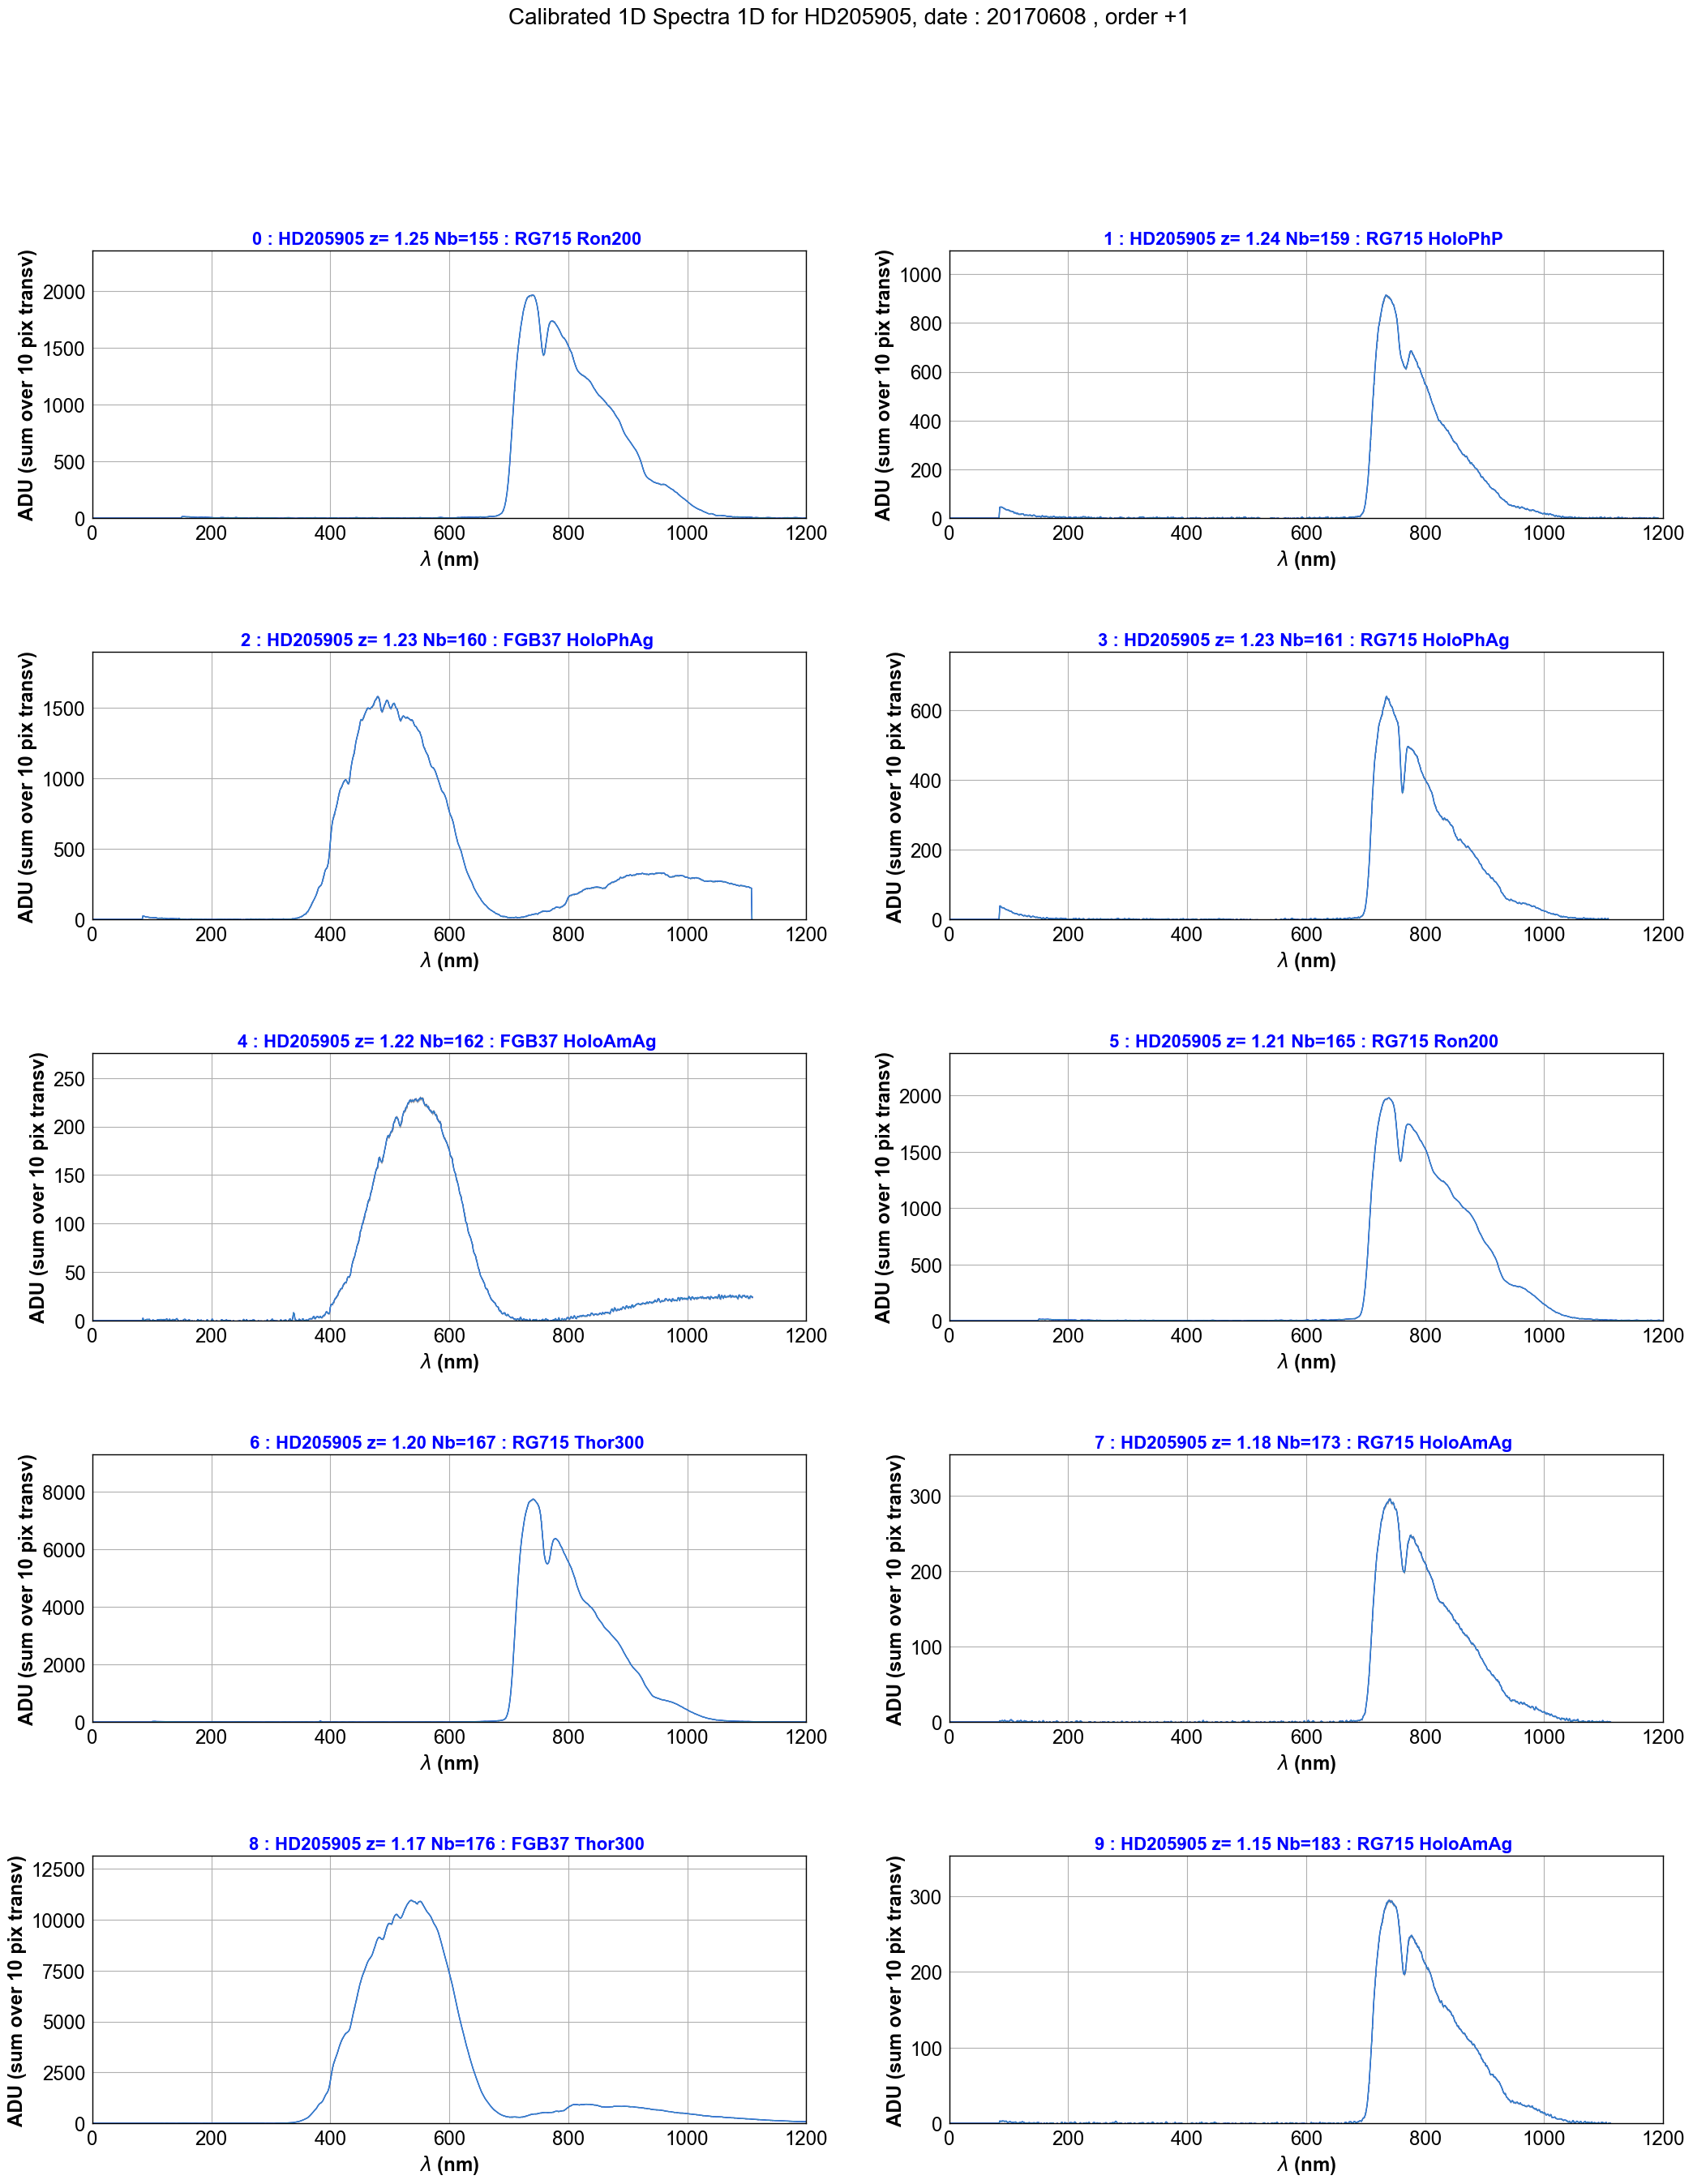

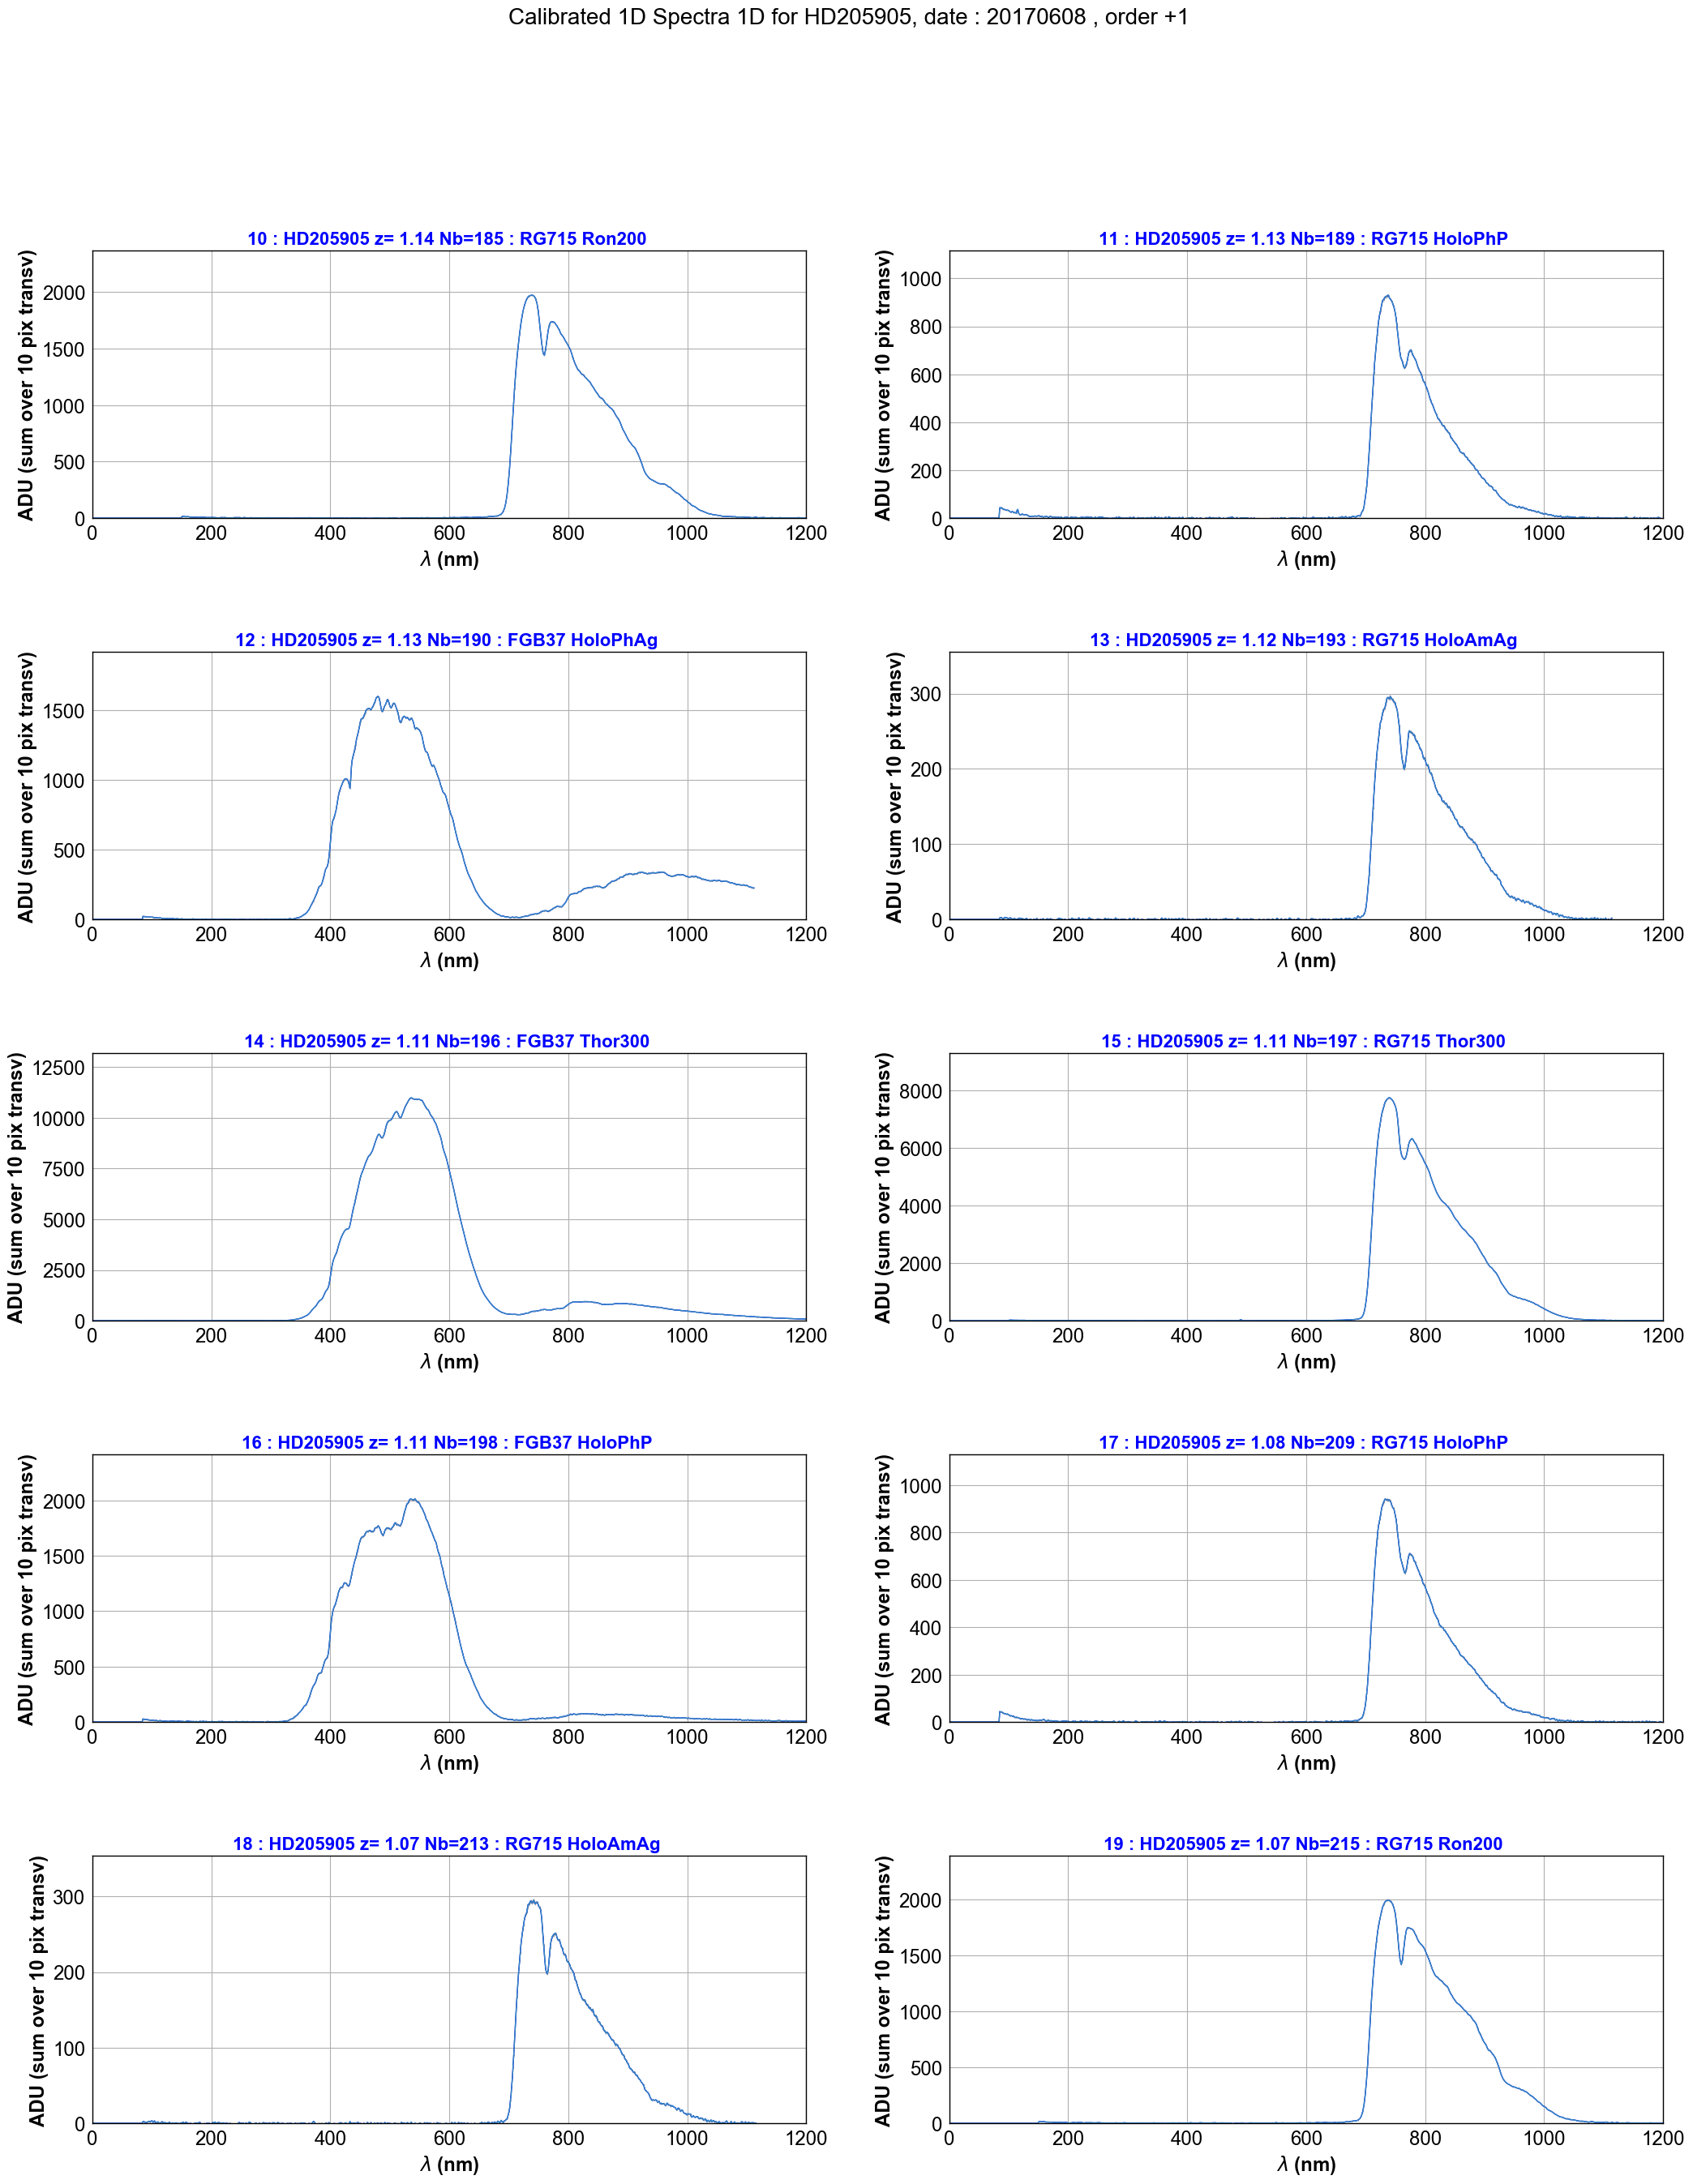

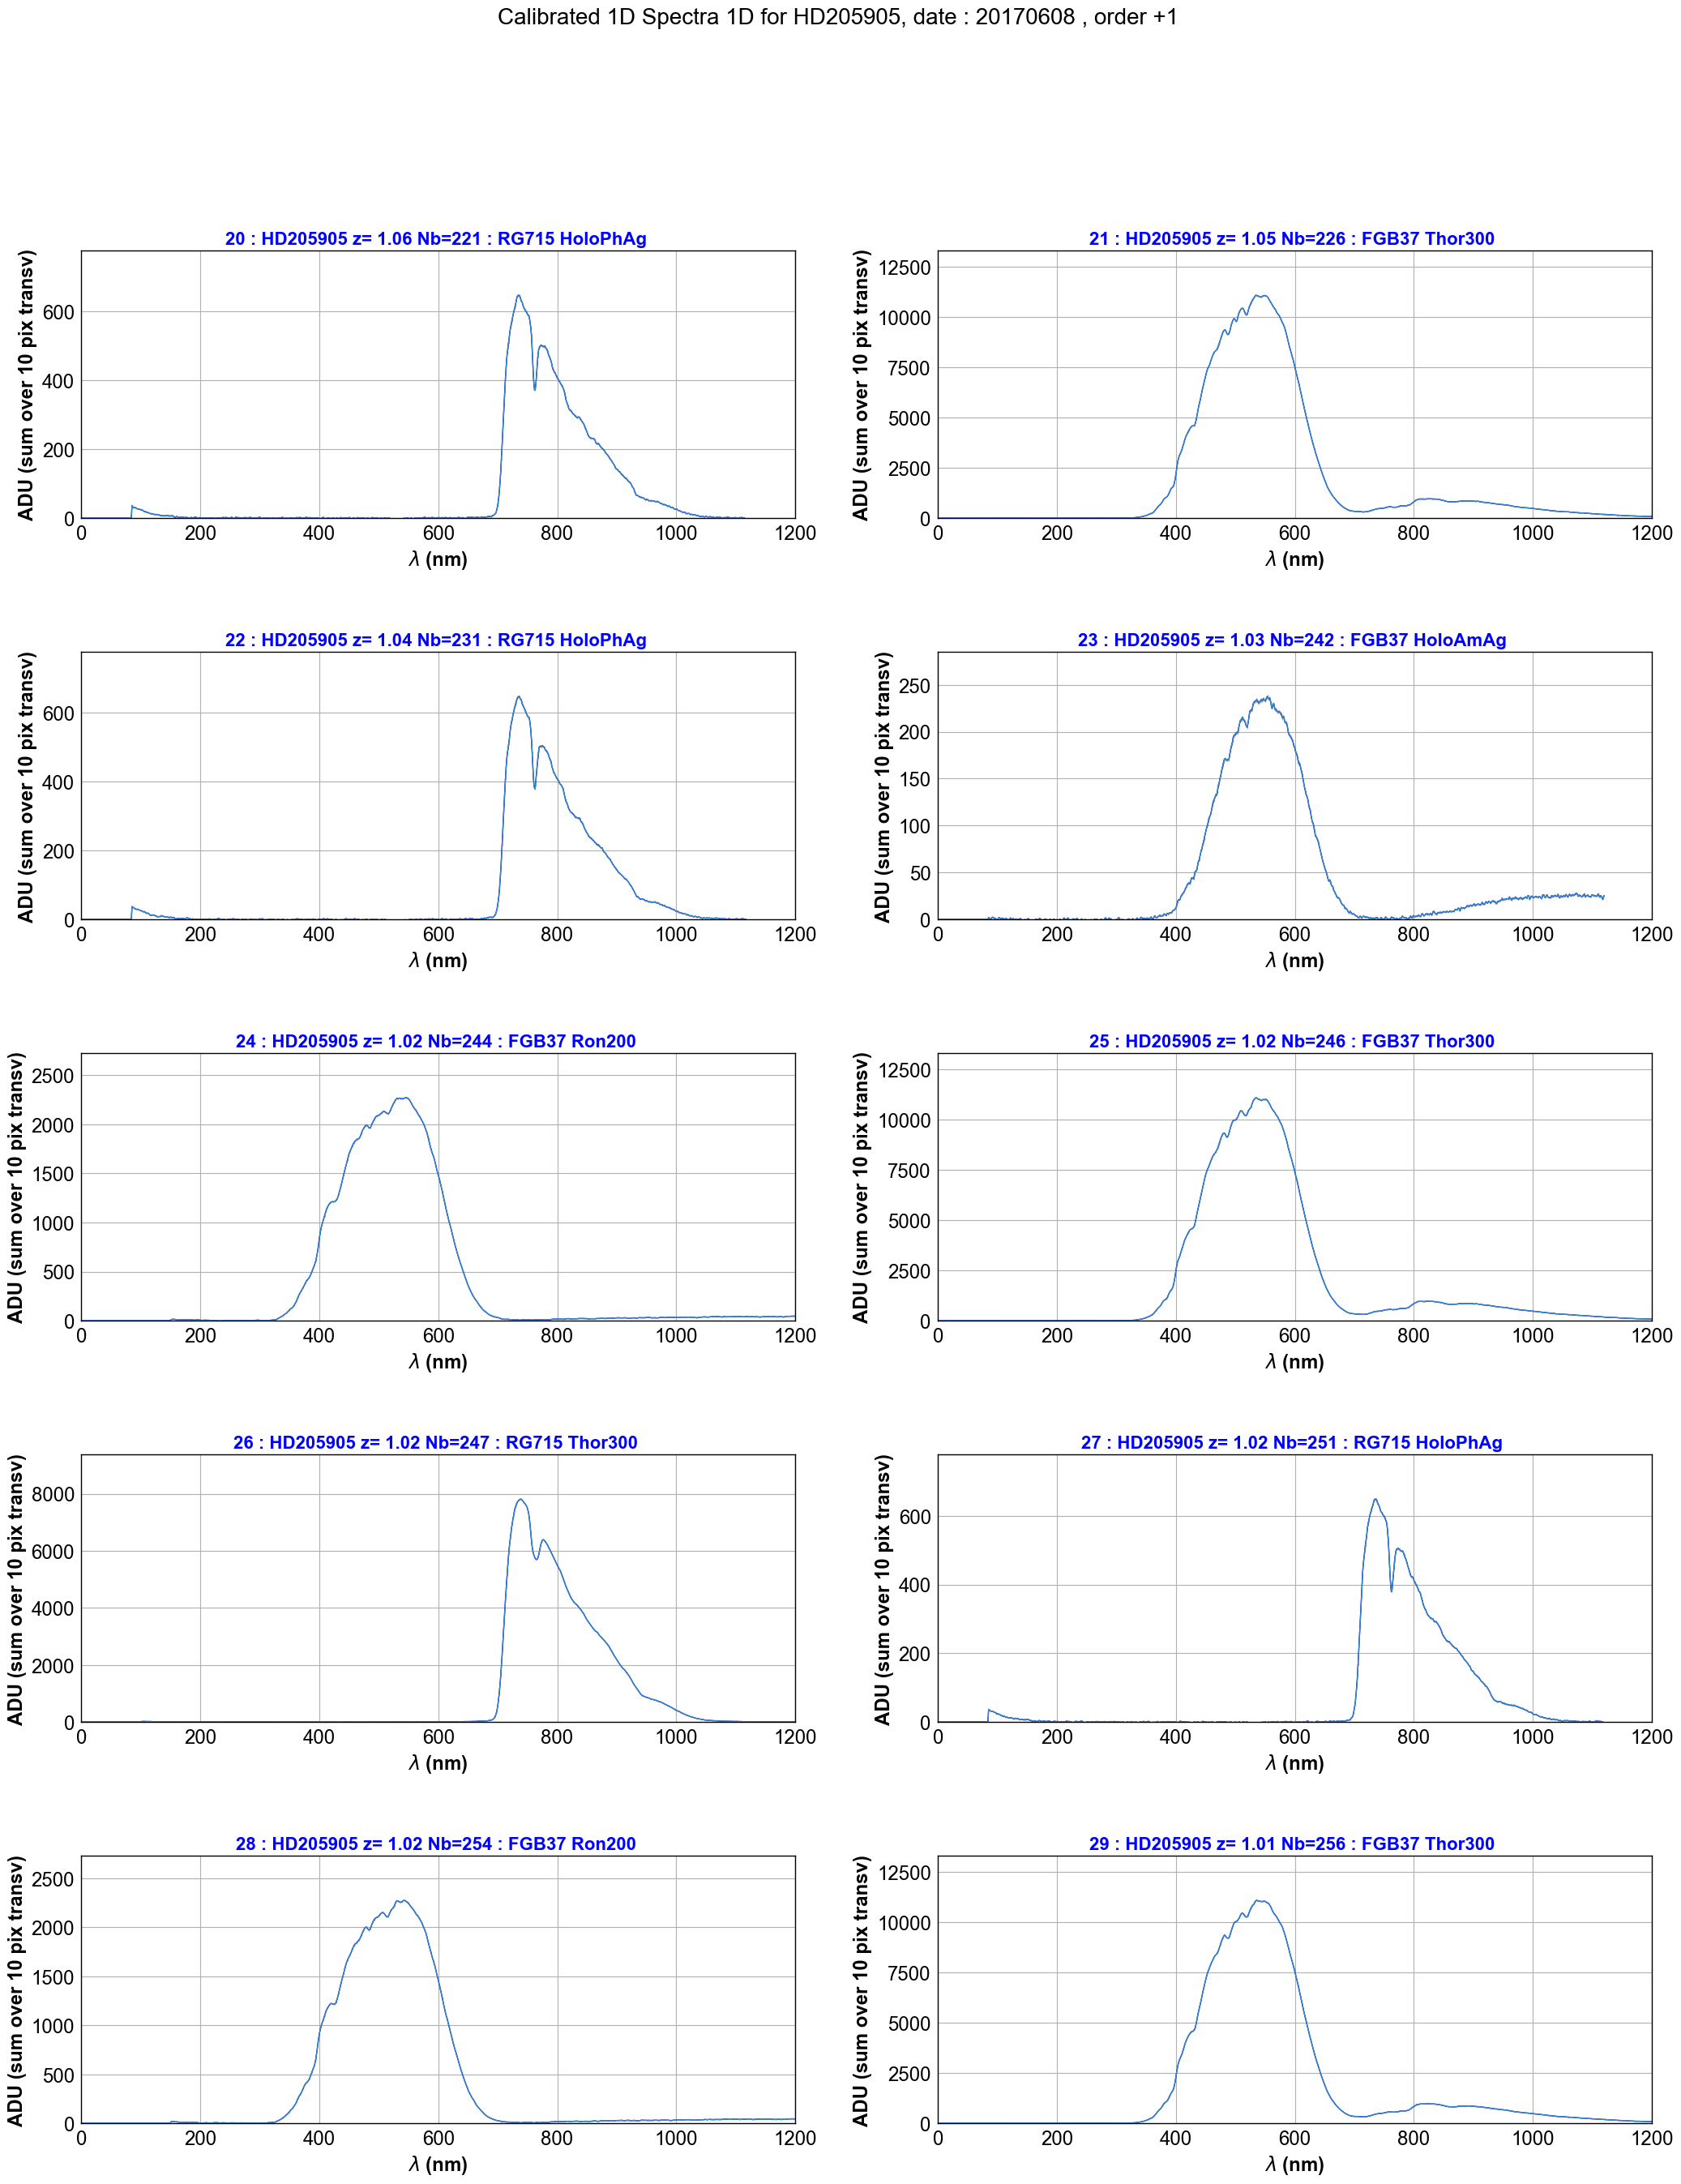

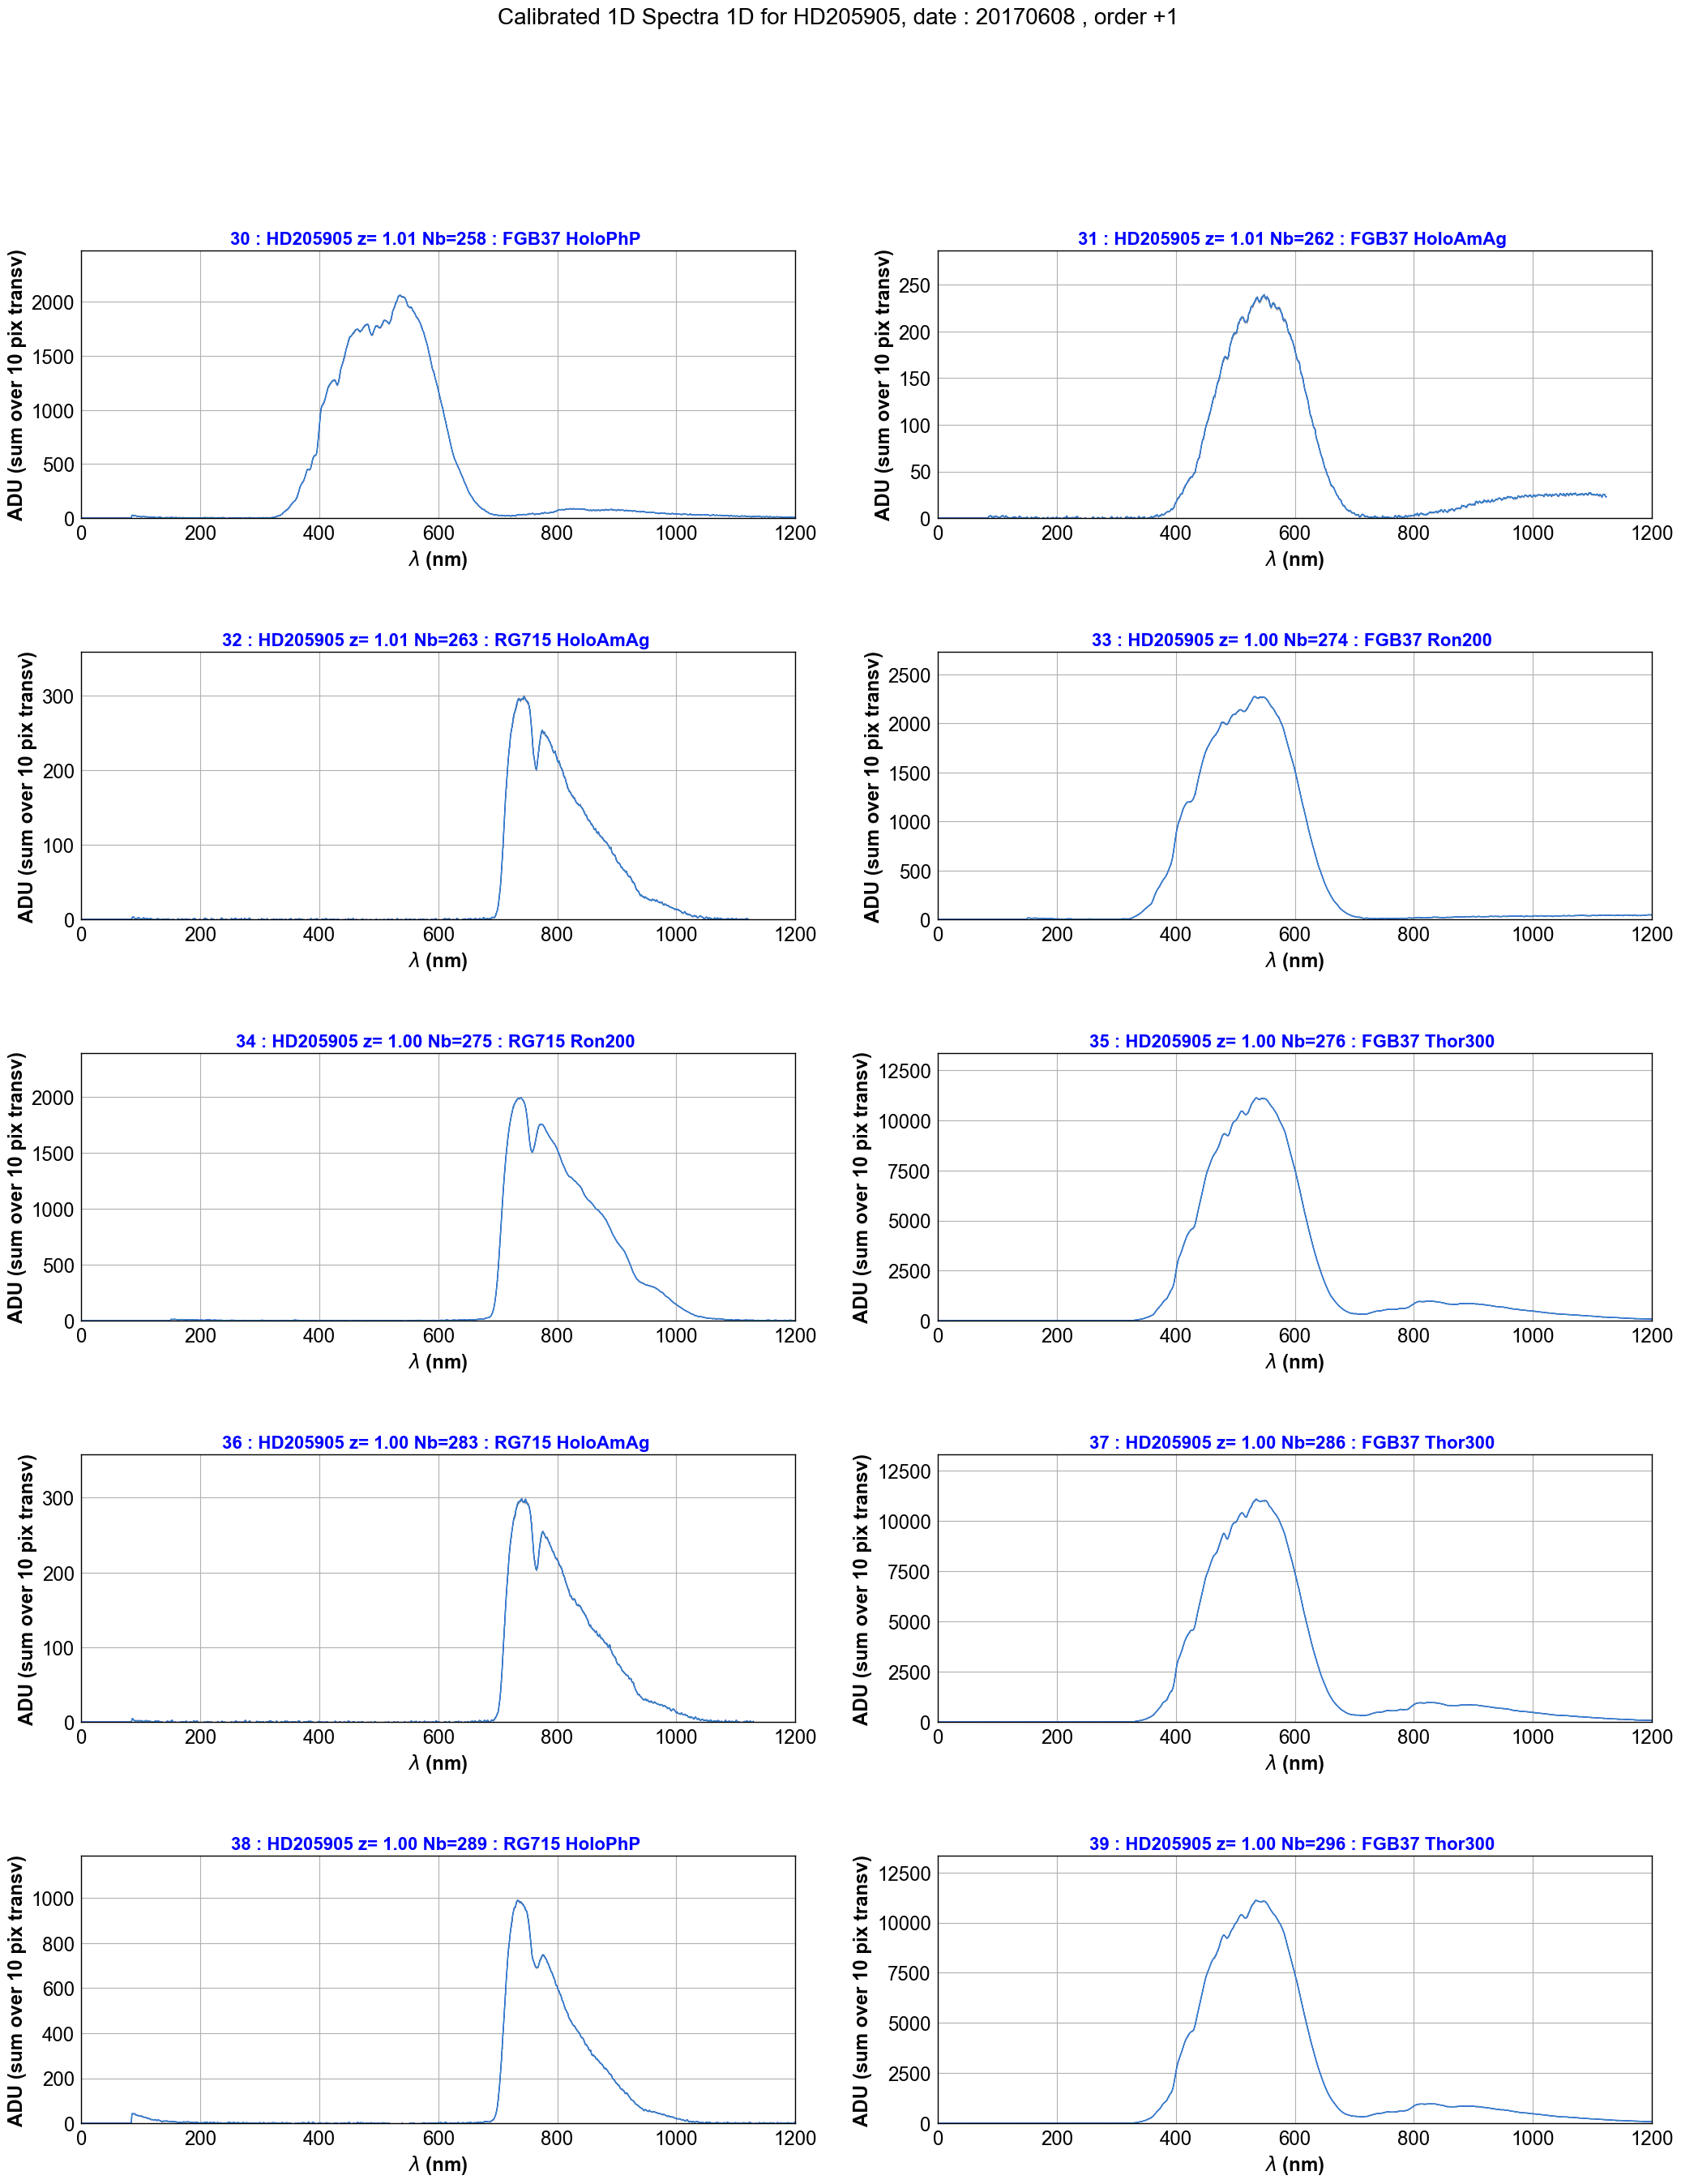

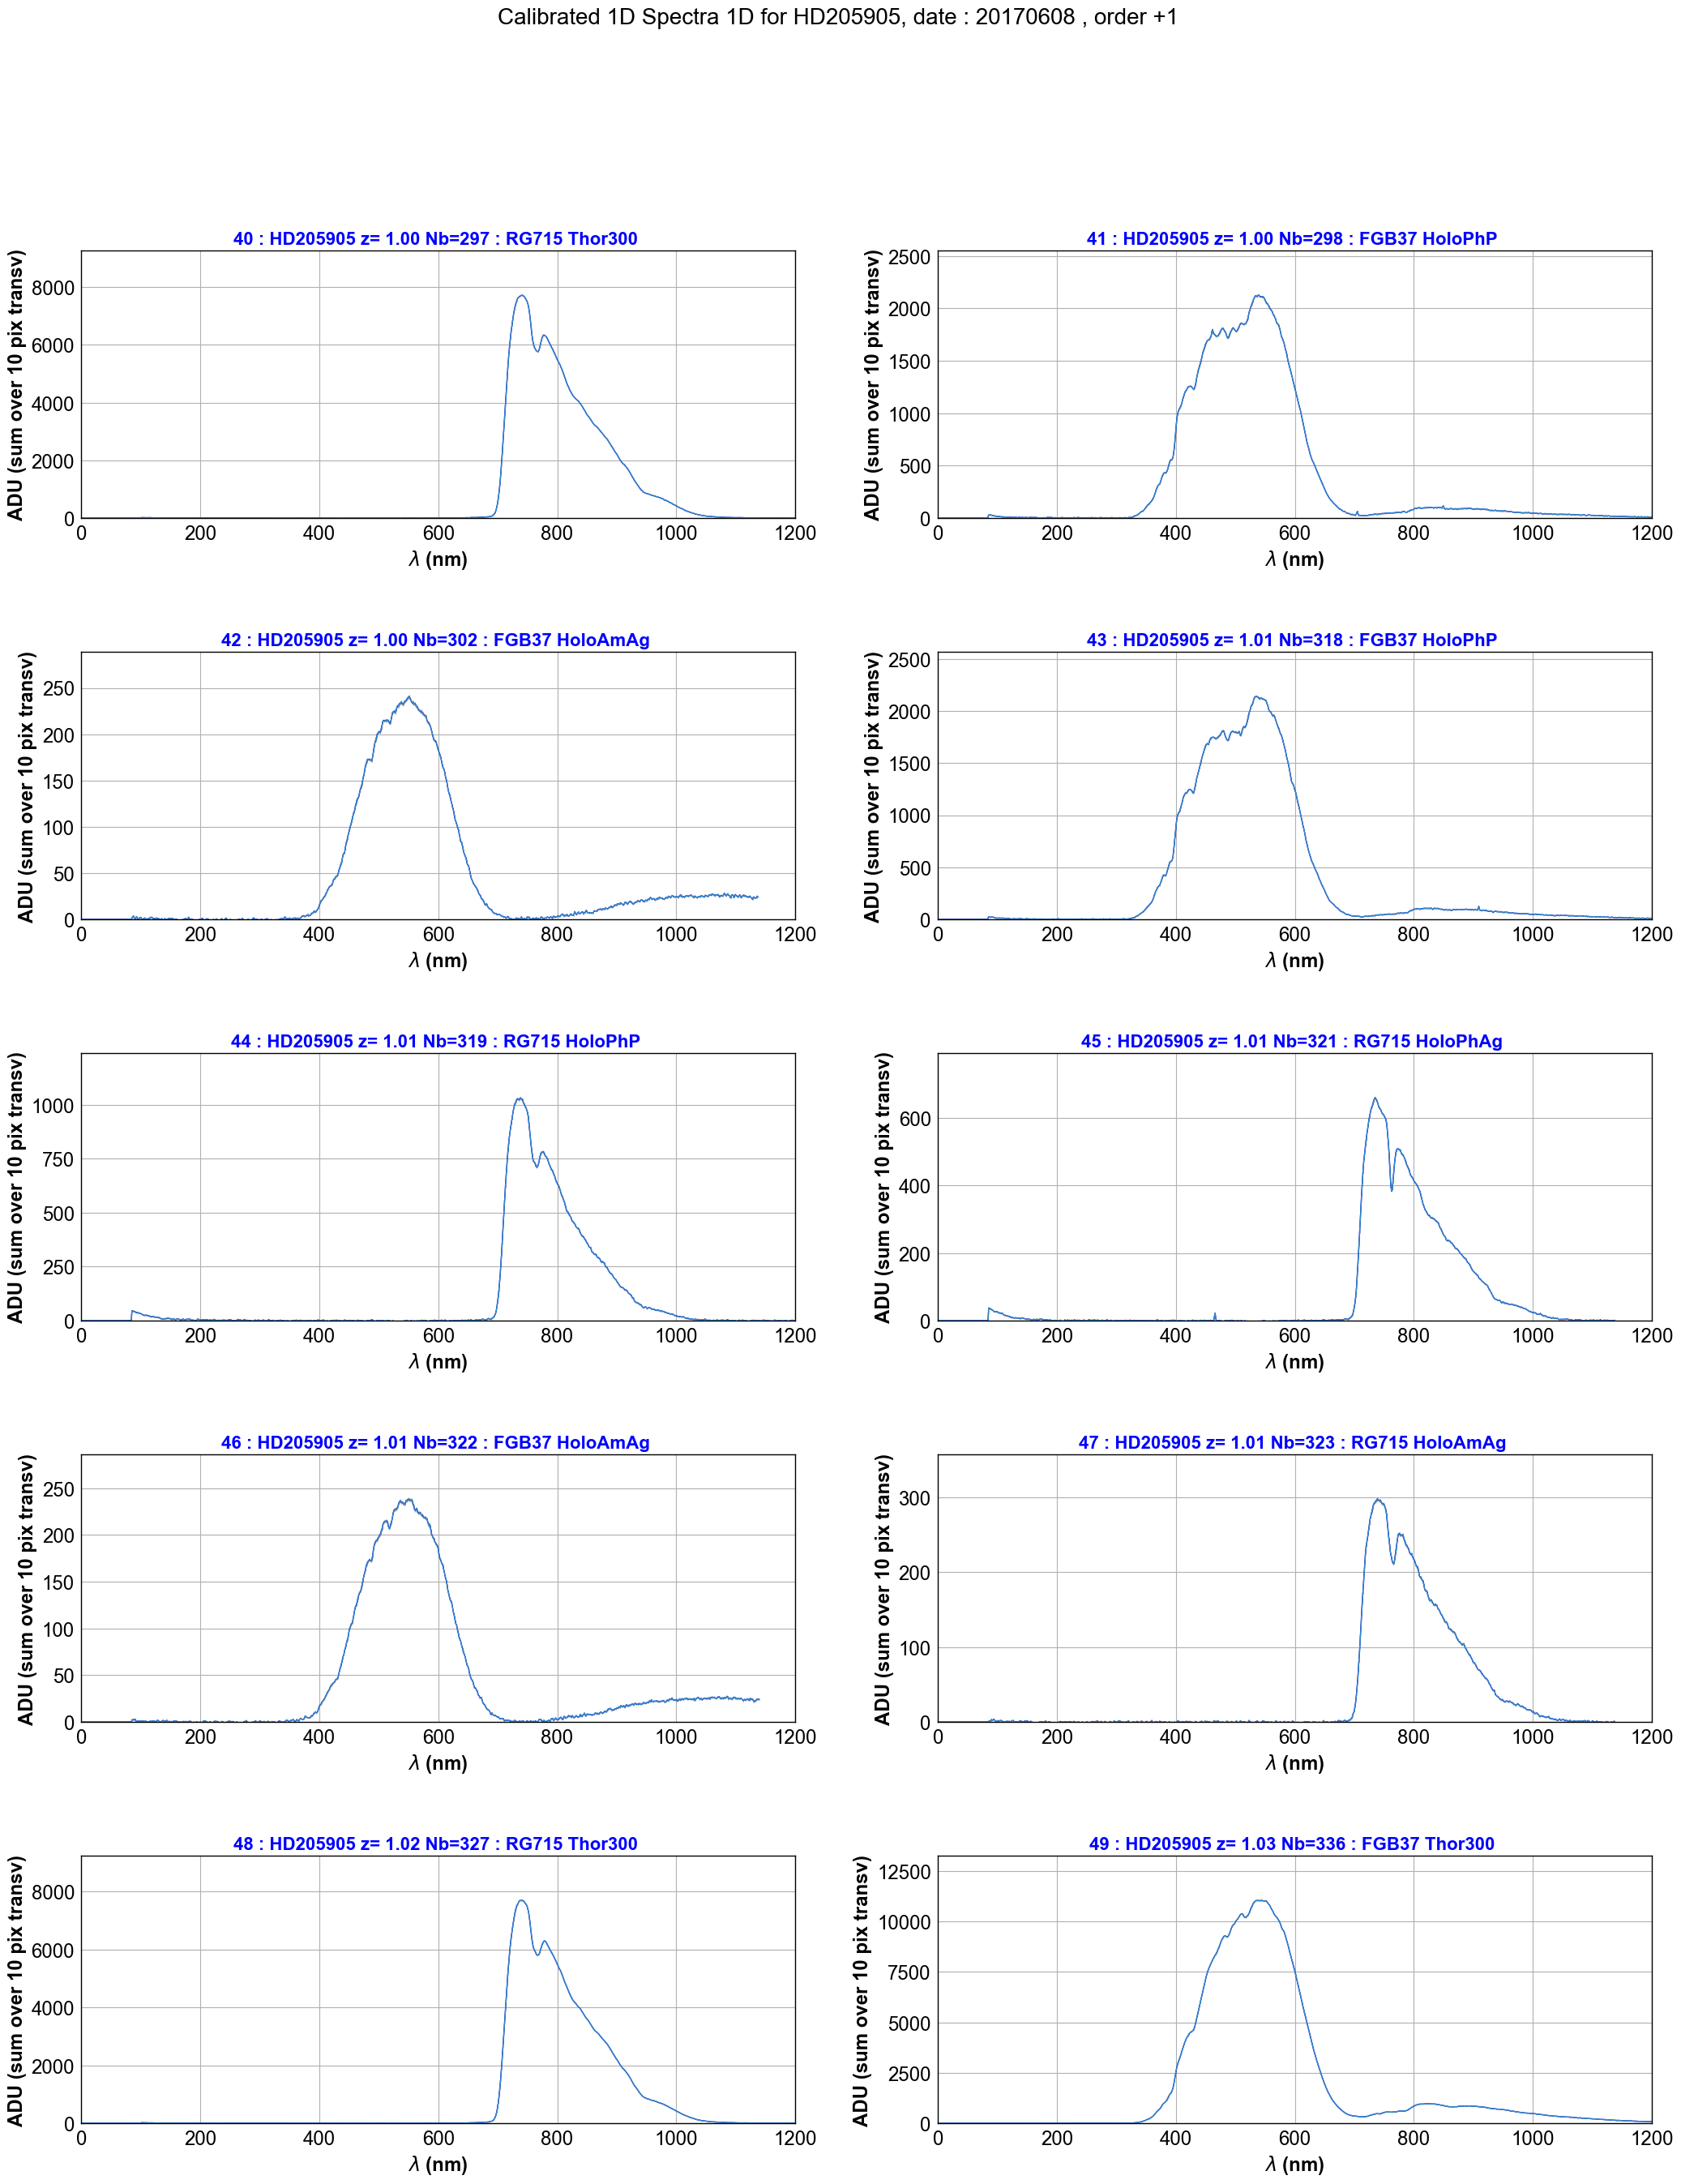

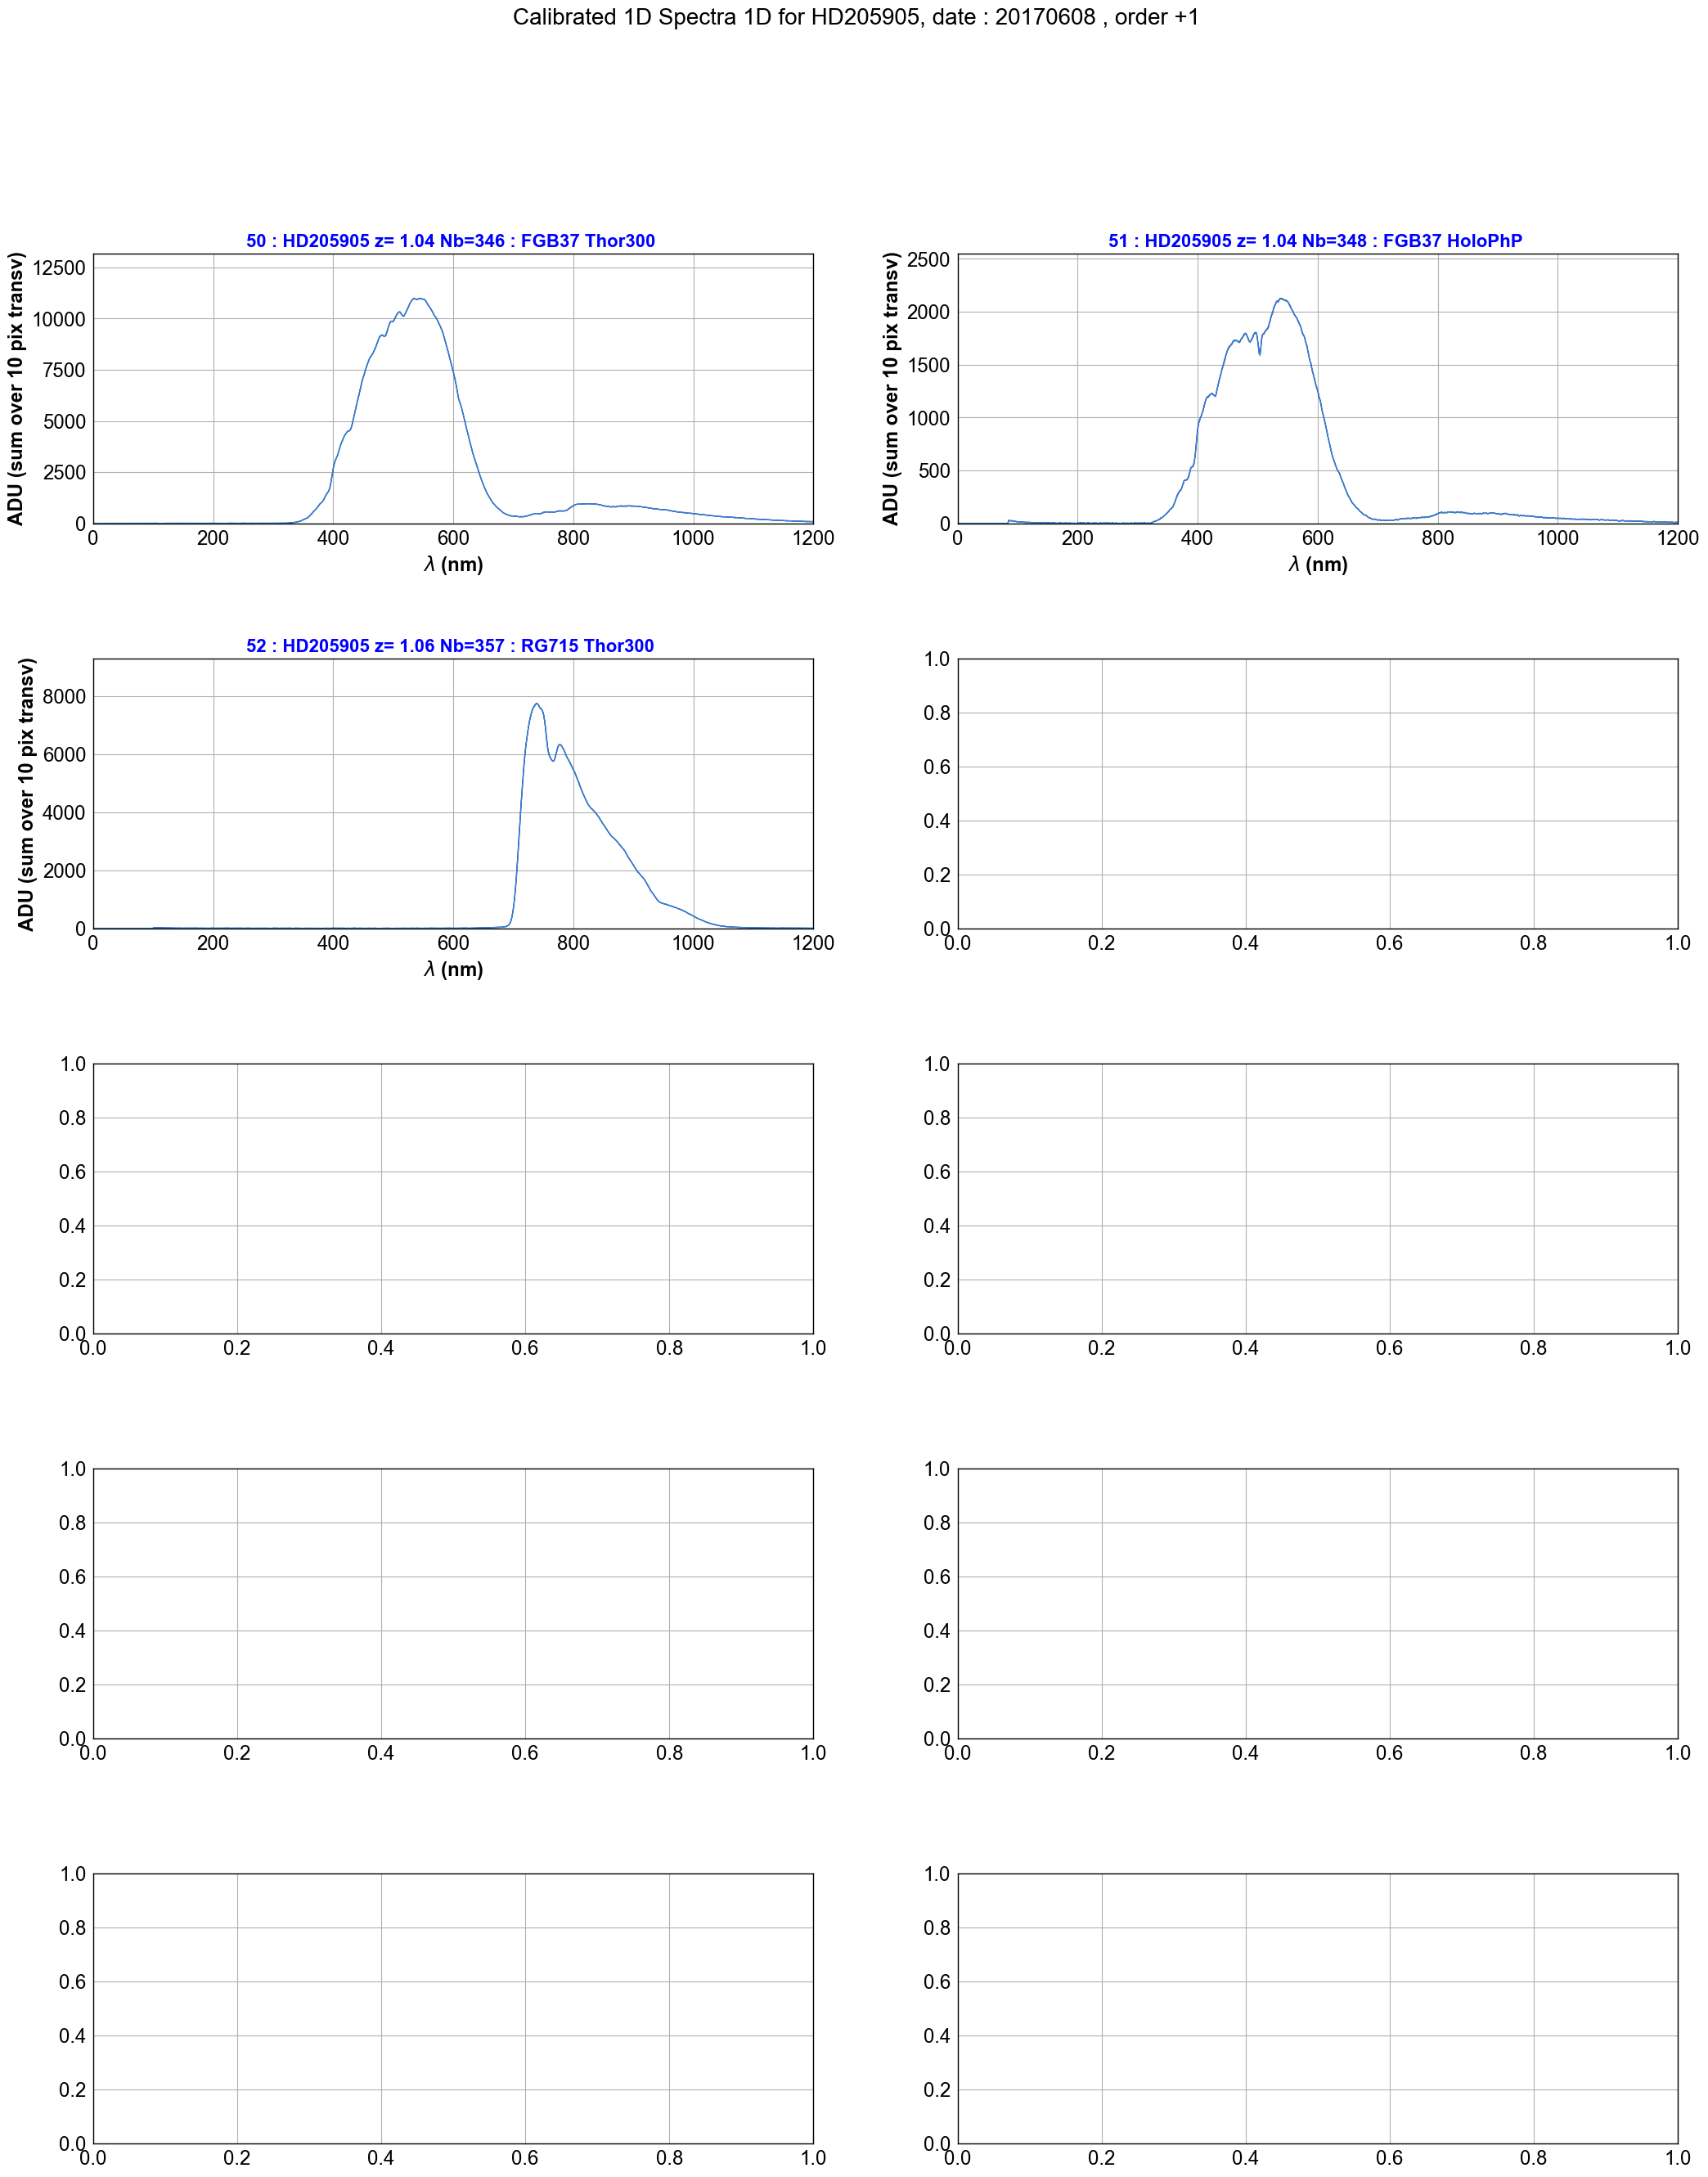

In [38]:
ShowCalibSpectrainPDF(all_rightspectra_data,all_rightspectra_data_stat_err,all_rightspectra_wl,all_titles,object_name,dir_top_images,all_filt,date,'calib1Dspectra_right.pdf','order +1')

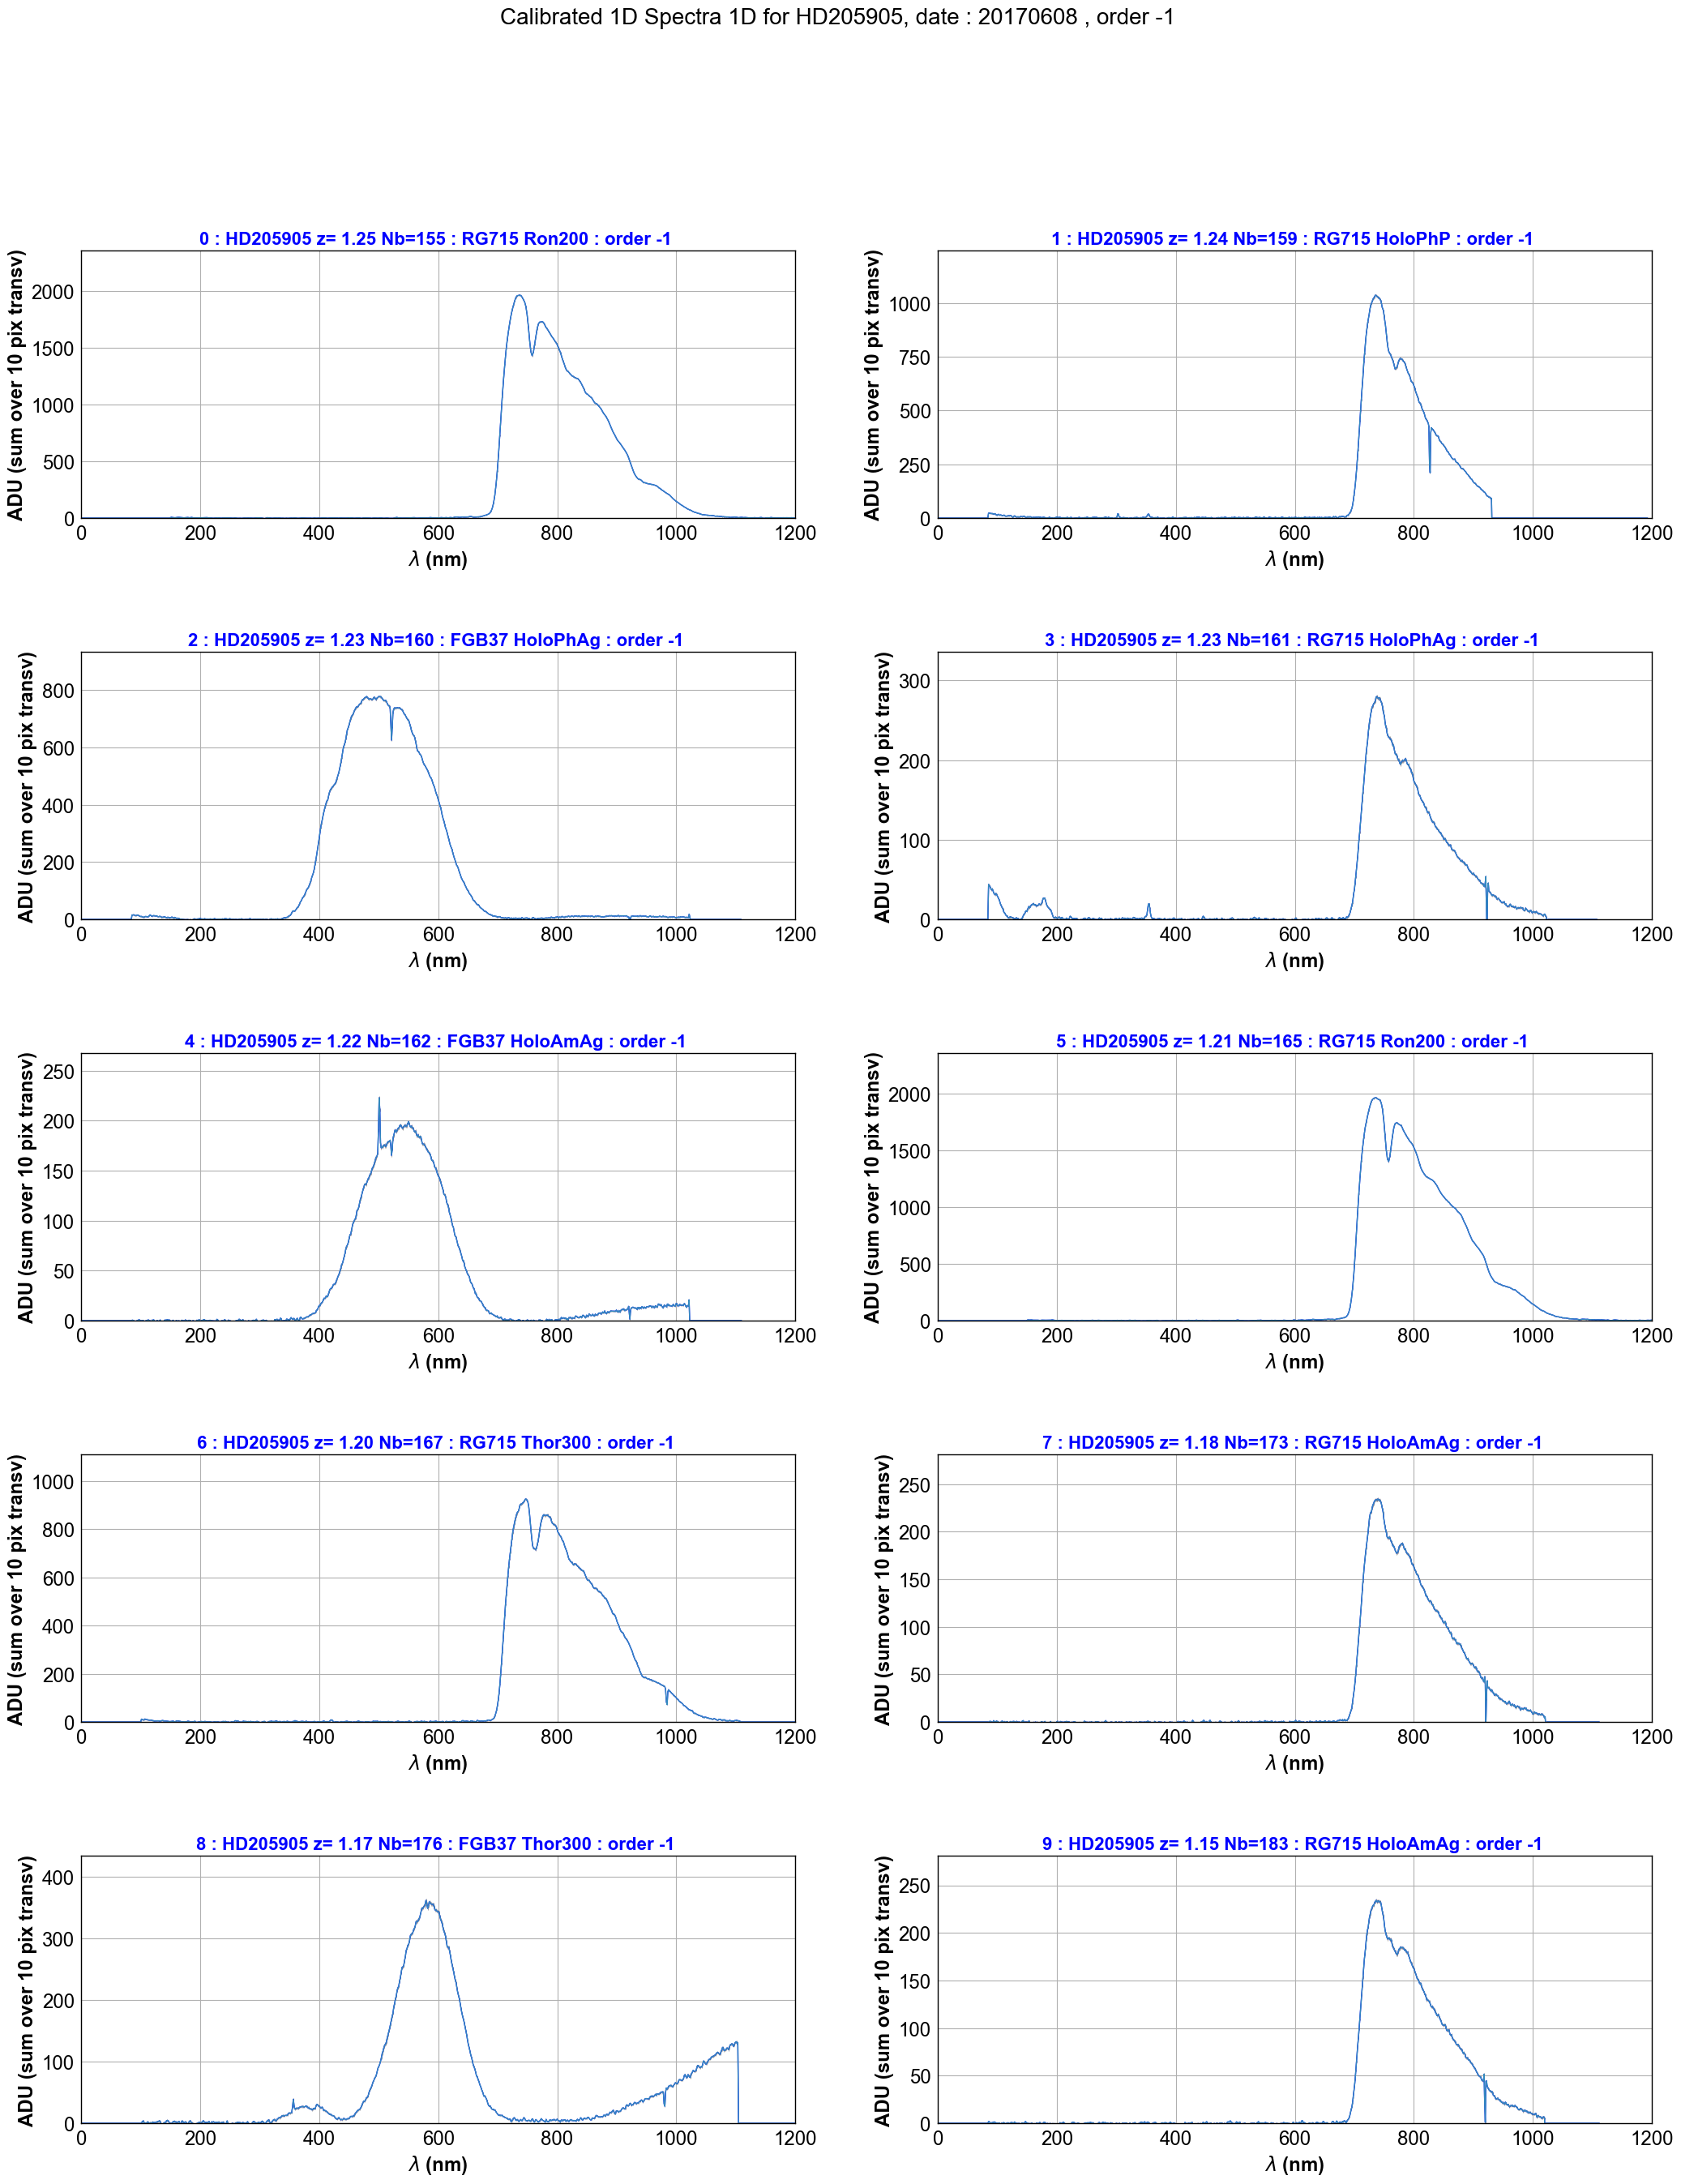

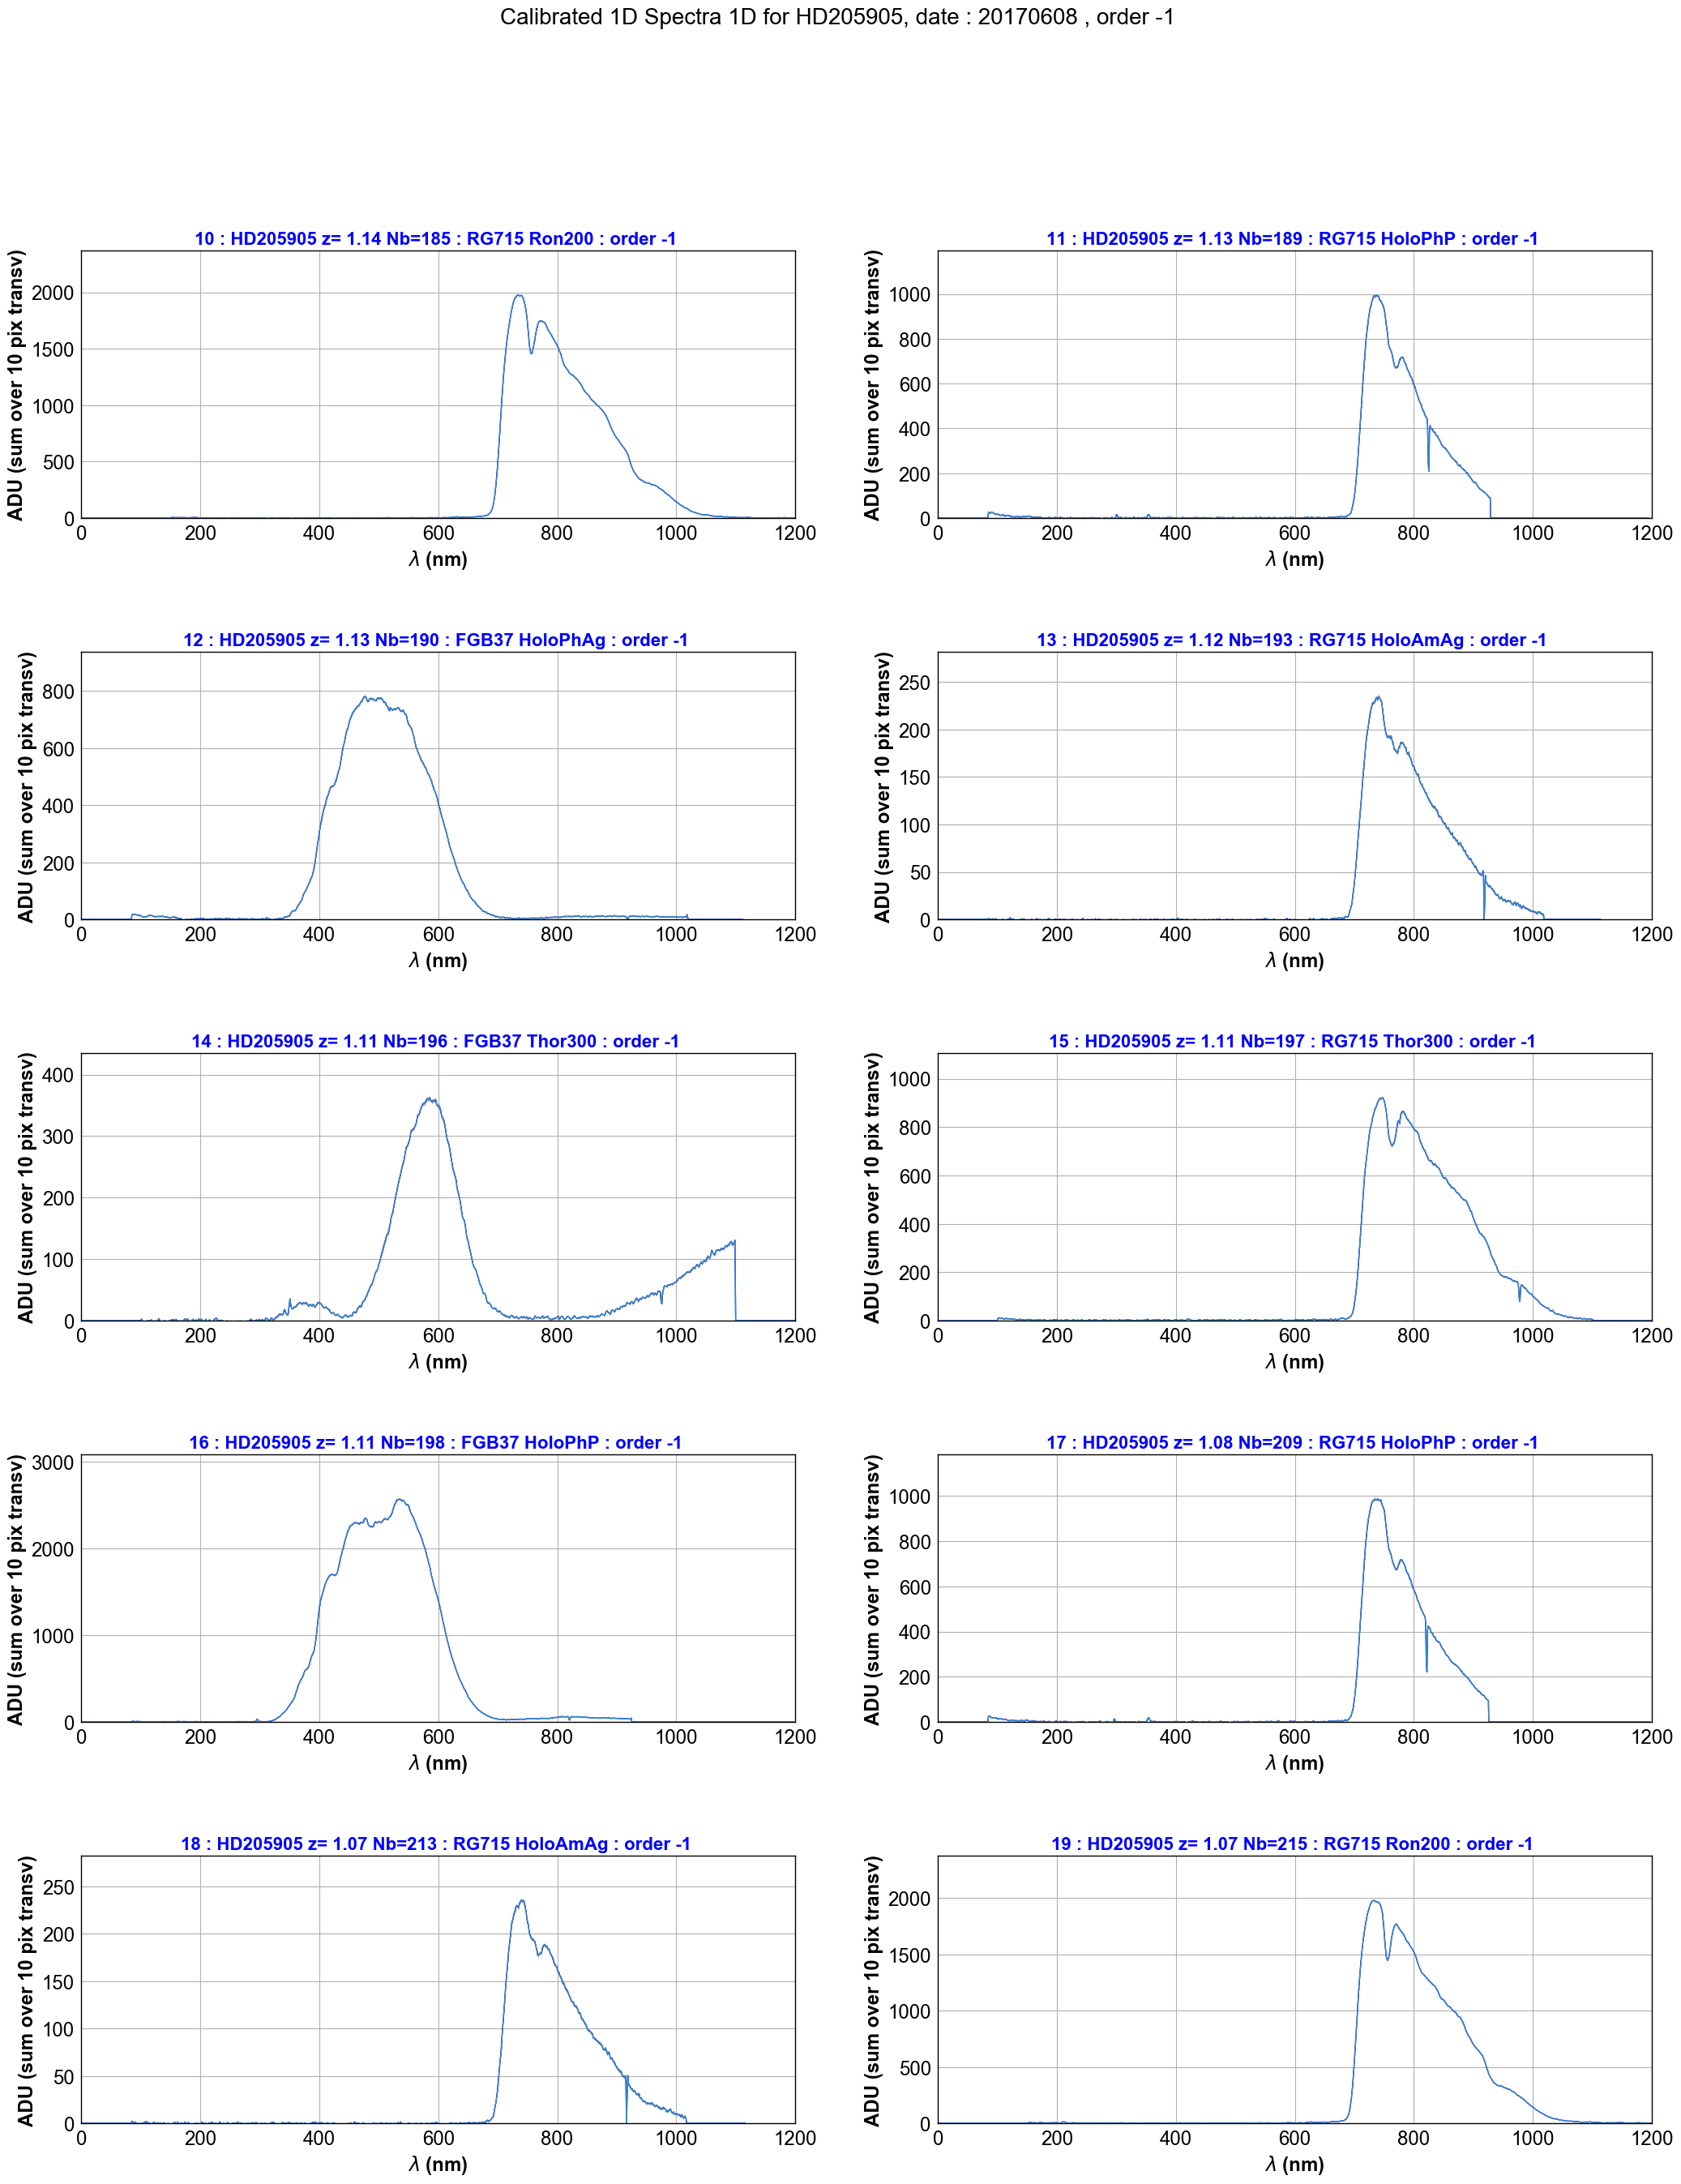

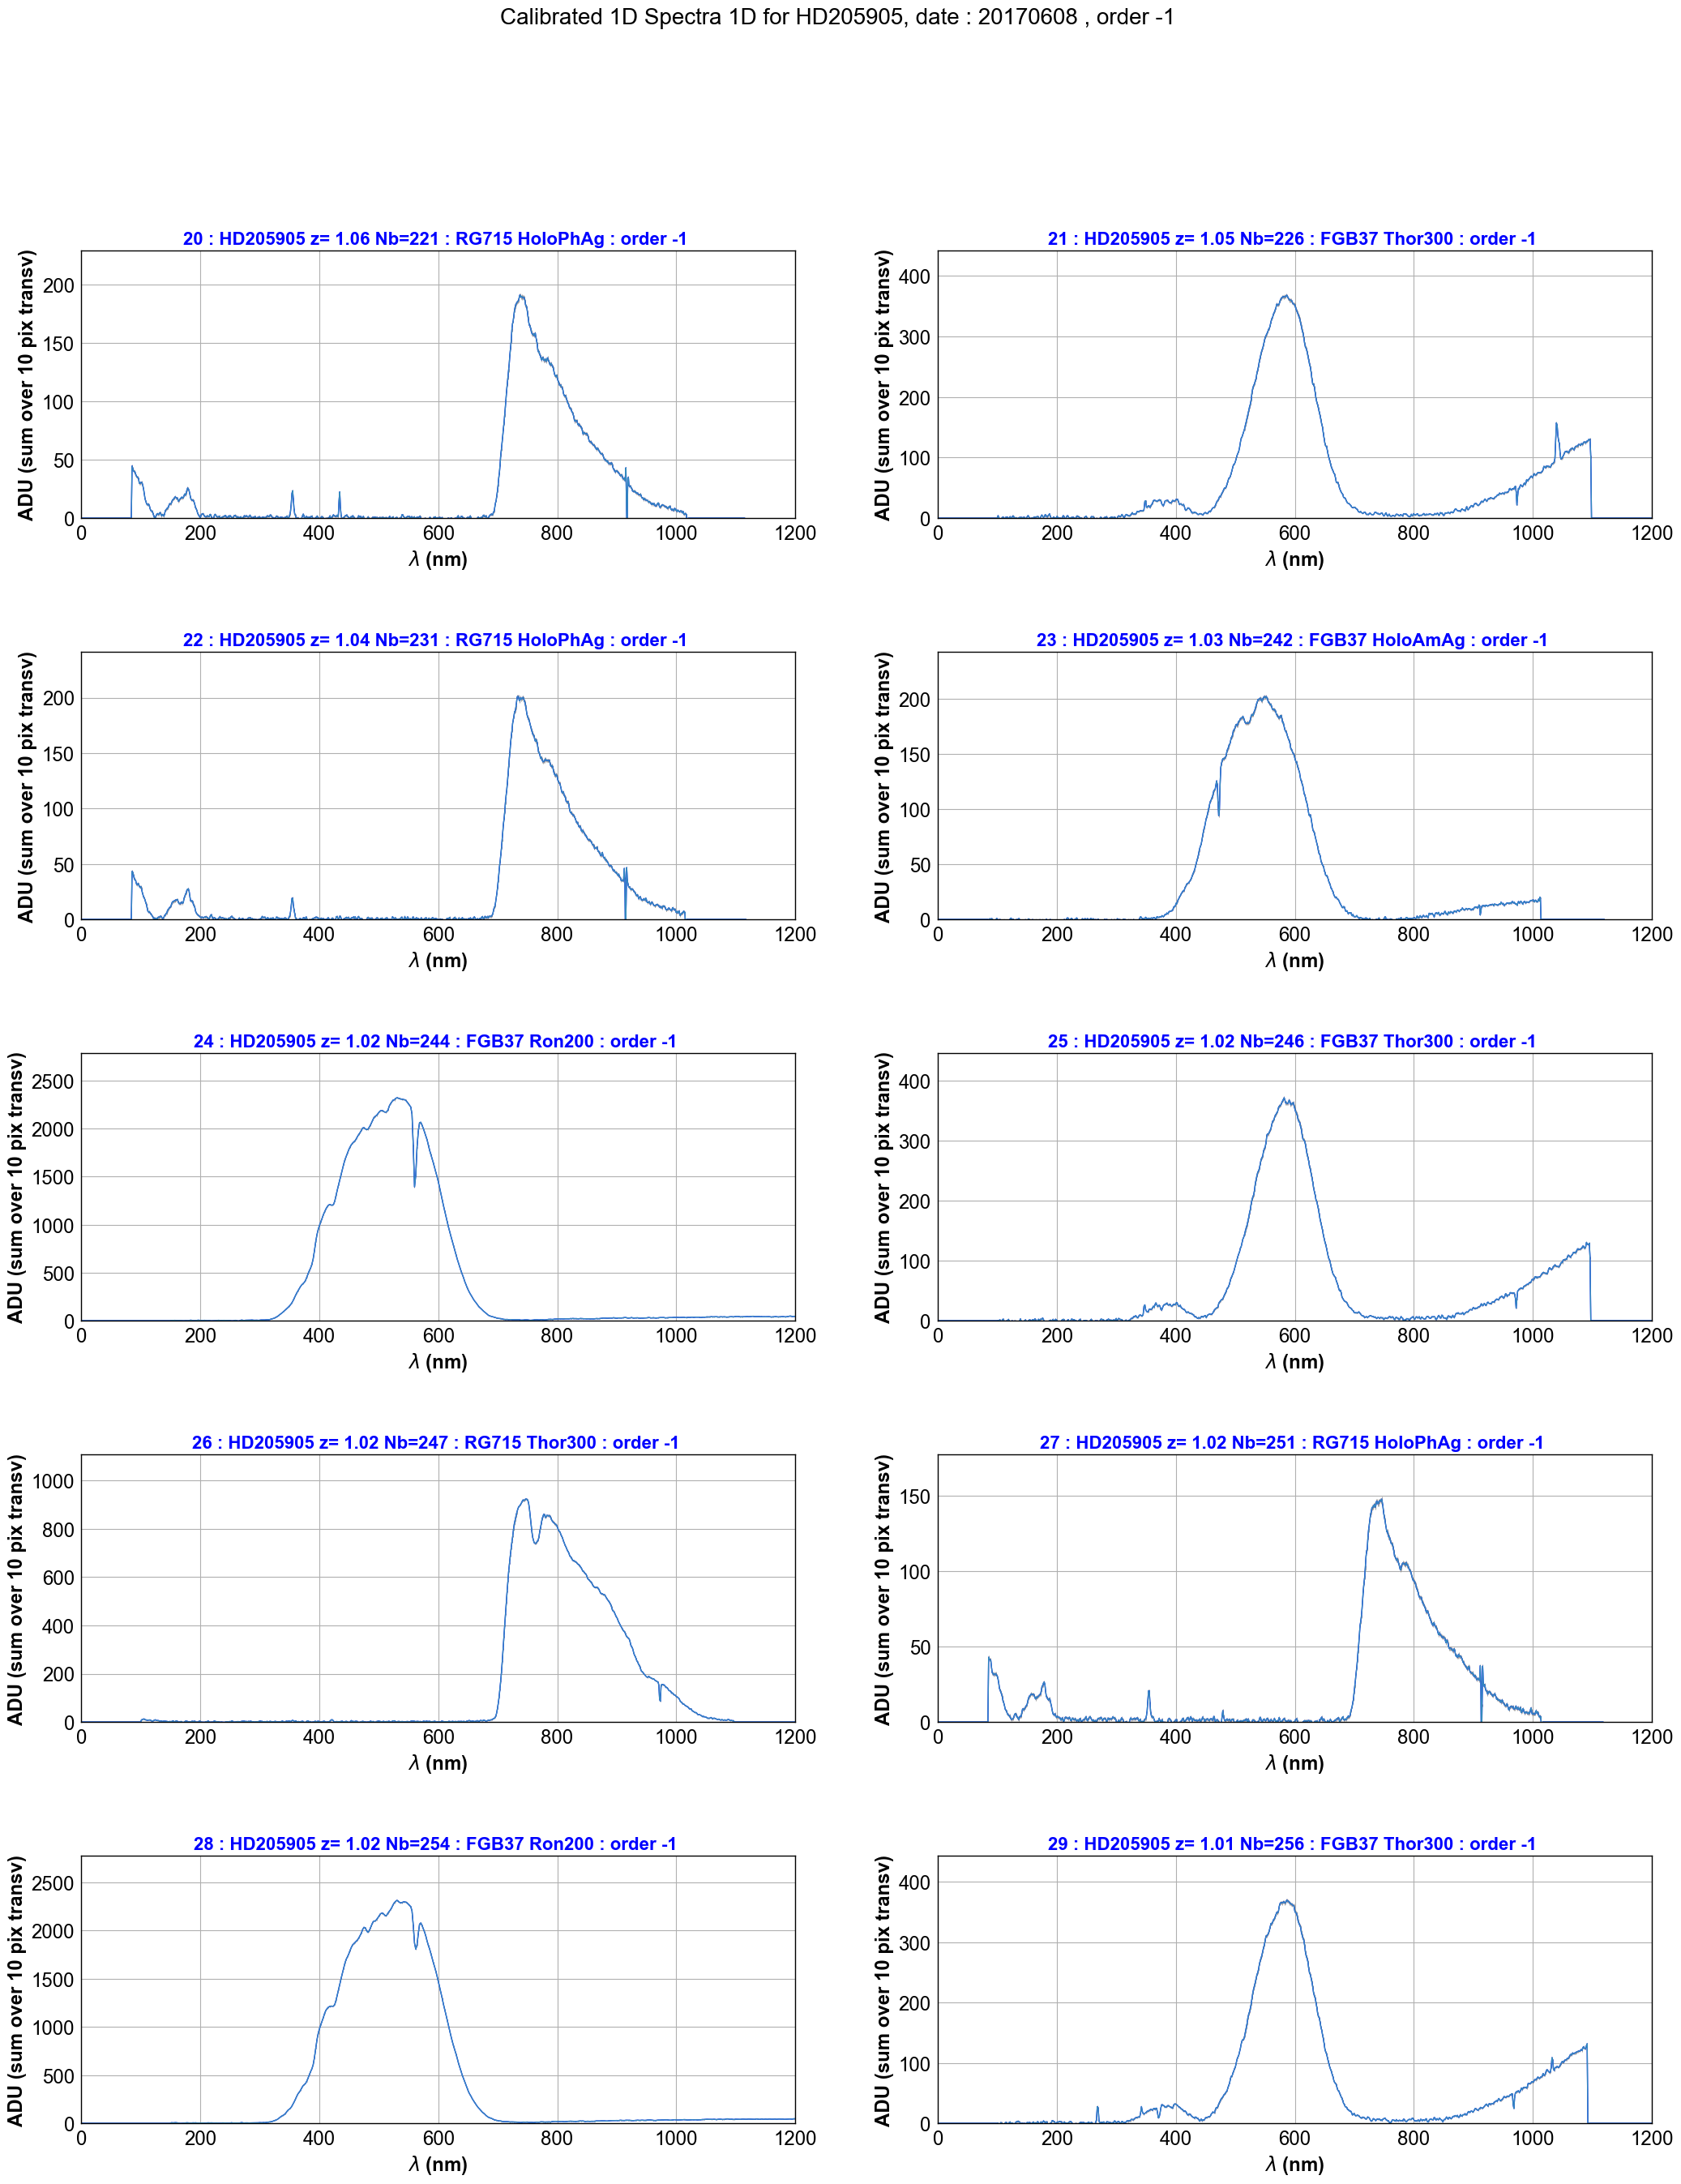

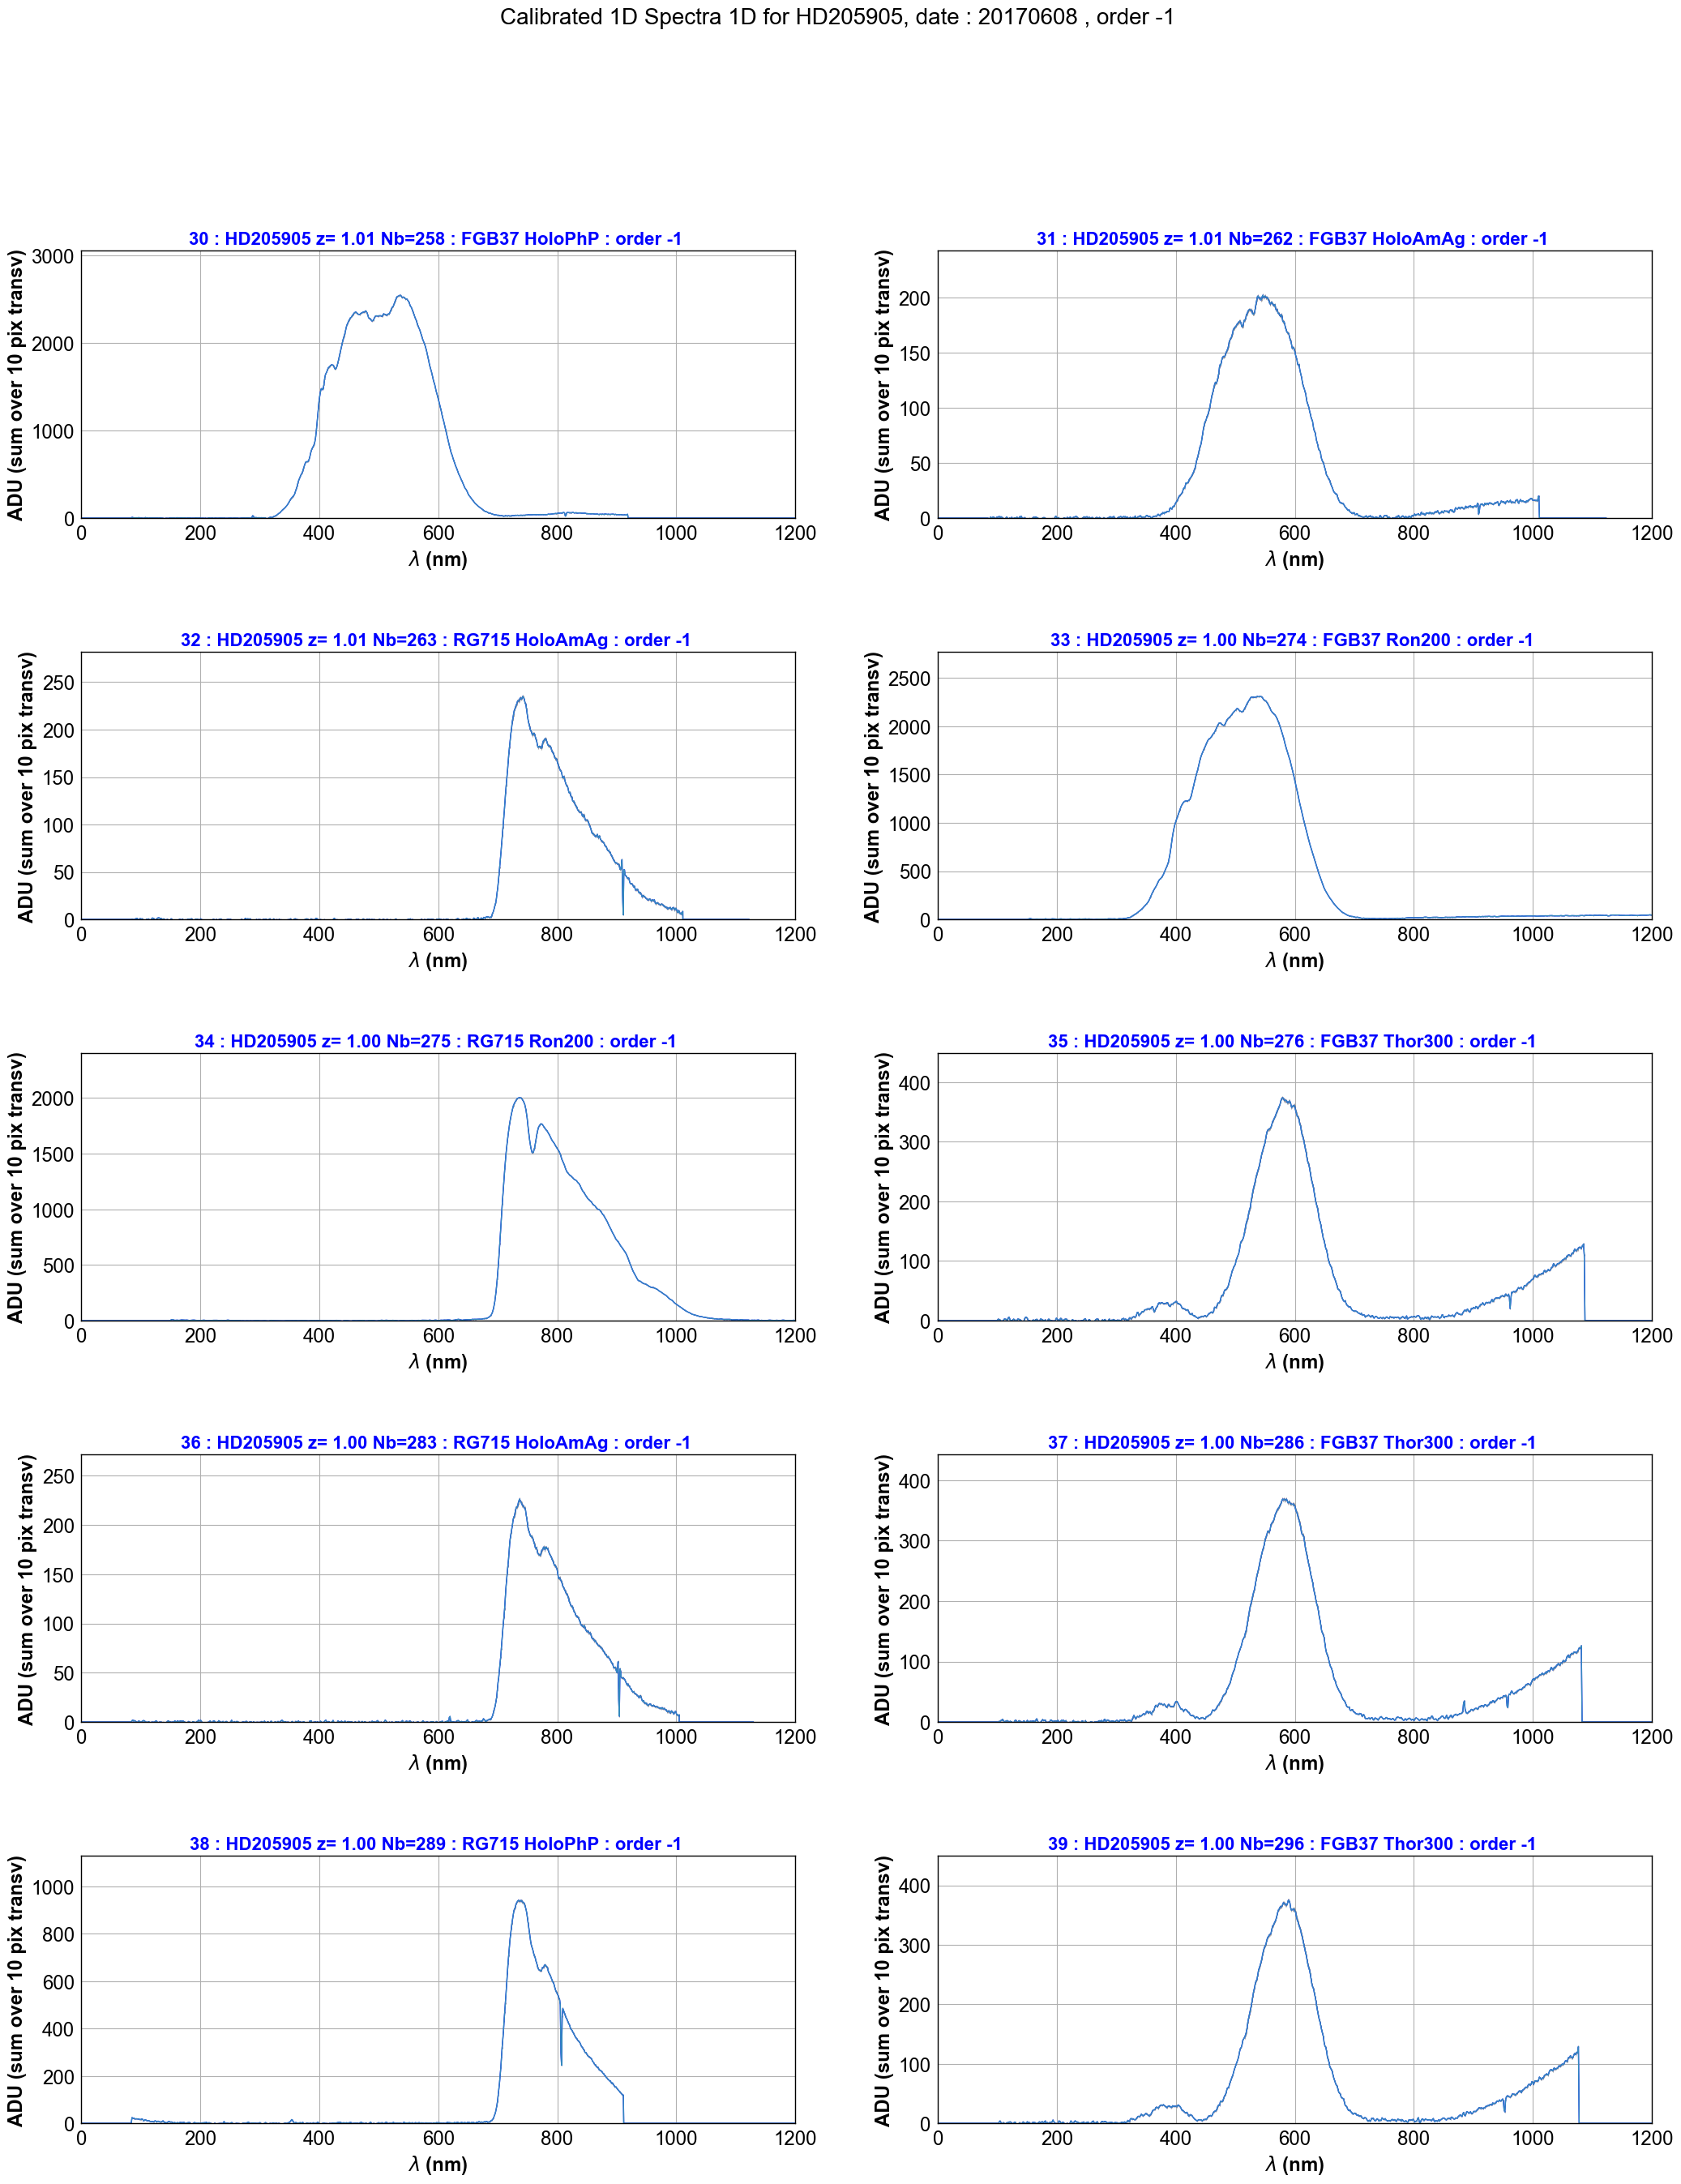

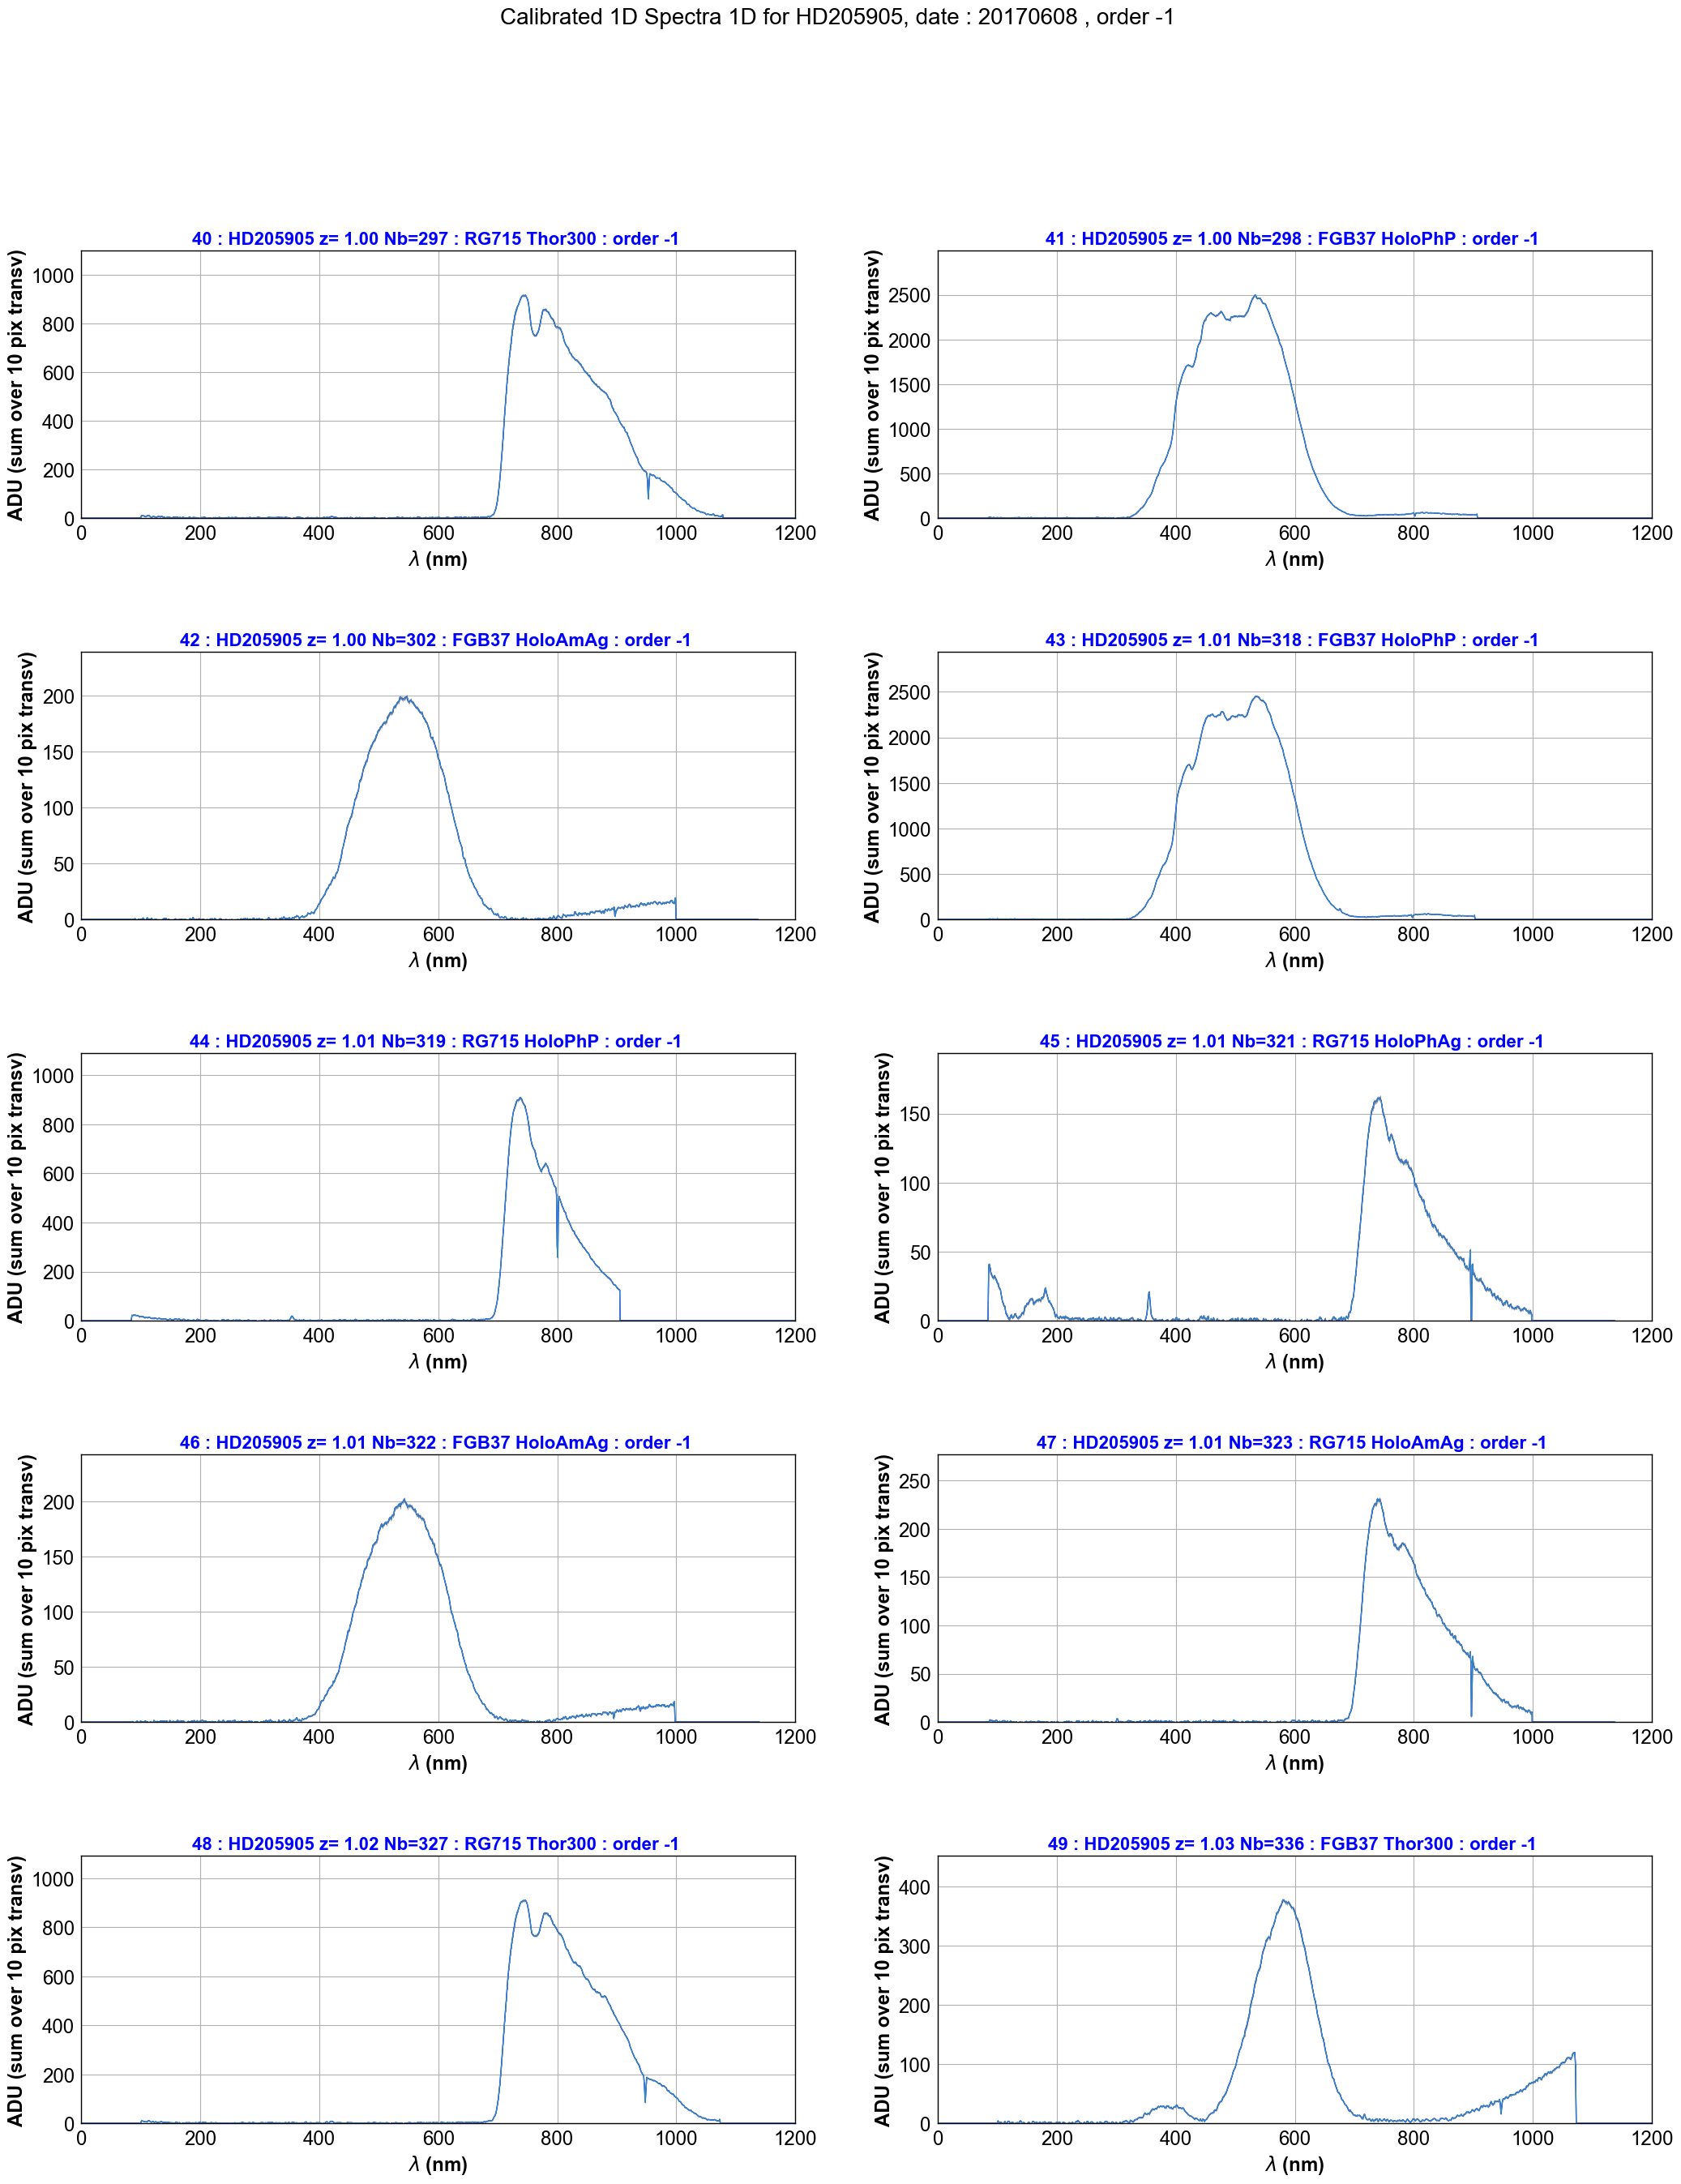

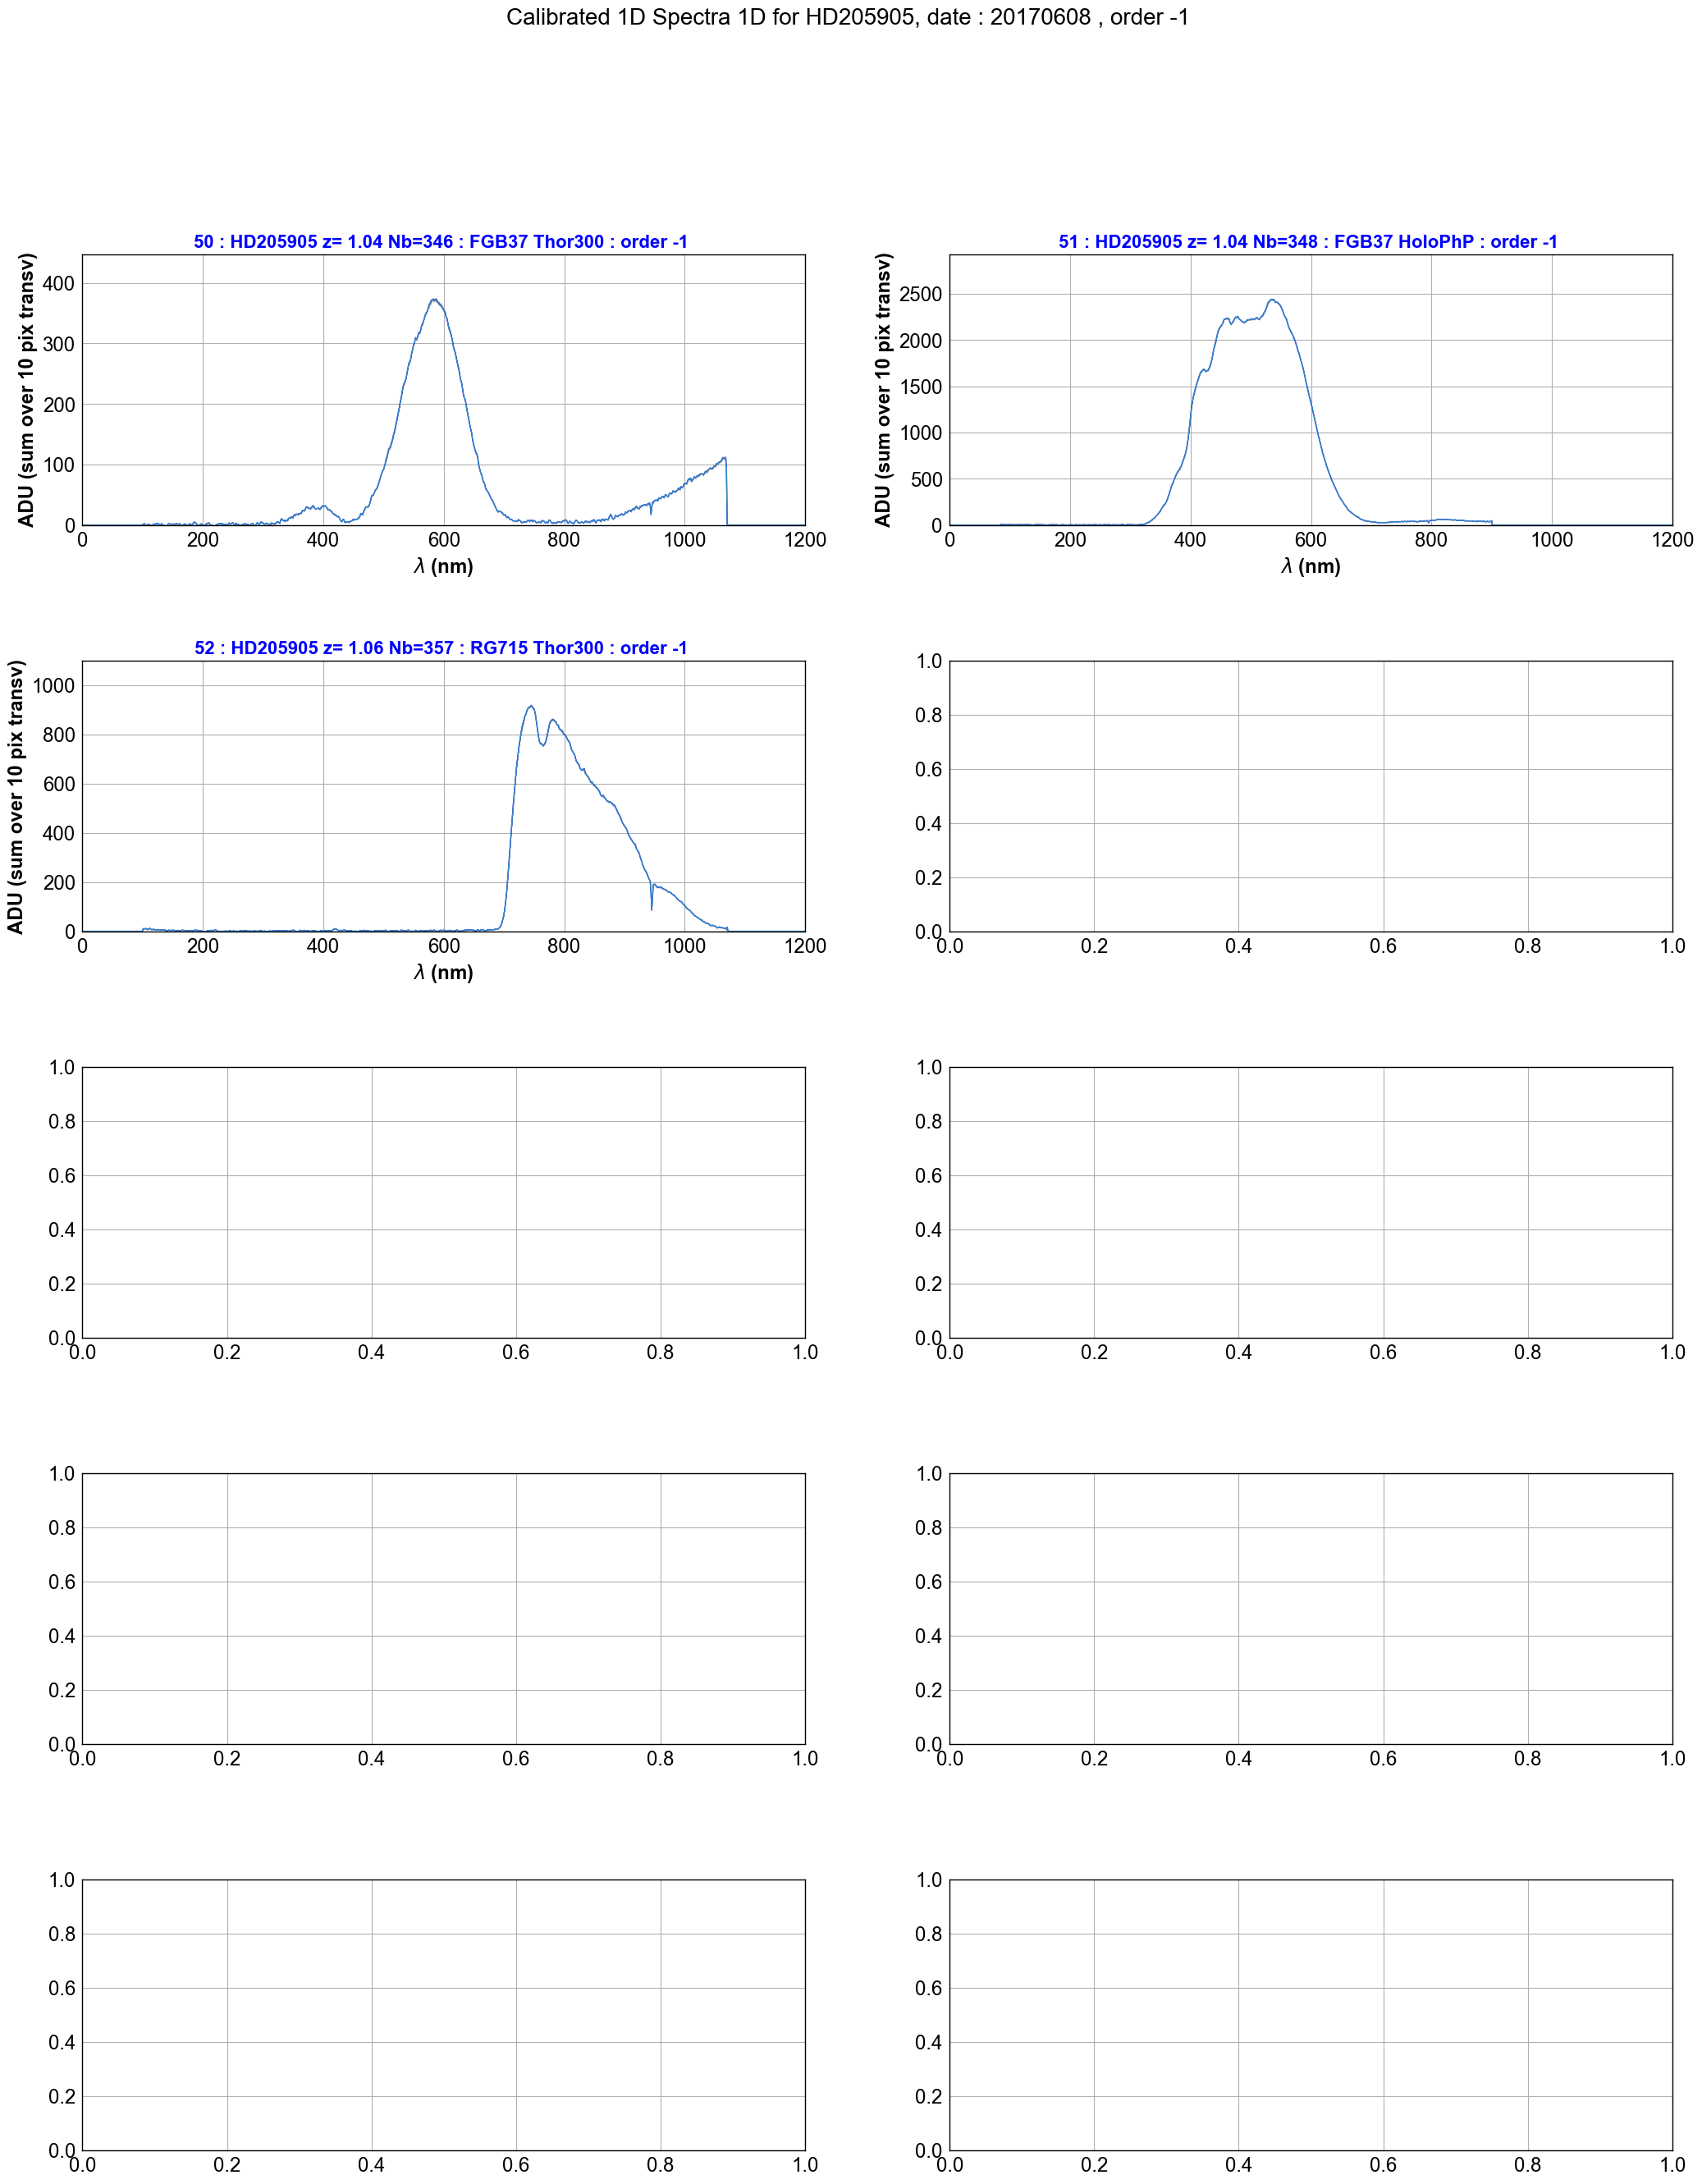

In [40]:
ShowCalibSpectrainPDF(all_leftspectra_data,all_leftspectra_data_stat_err,all_leftspectra_wl,all_titles,object_name,dir_top_images,all_filt,date,'calib1Dspectra_left.pdf','order -1')

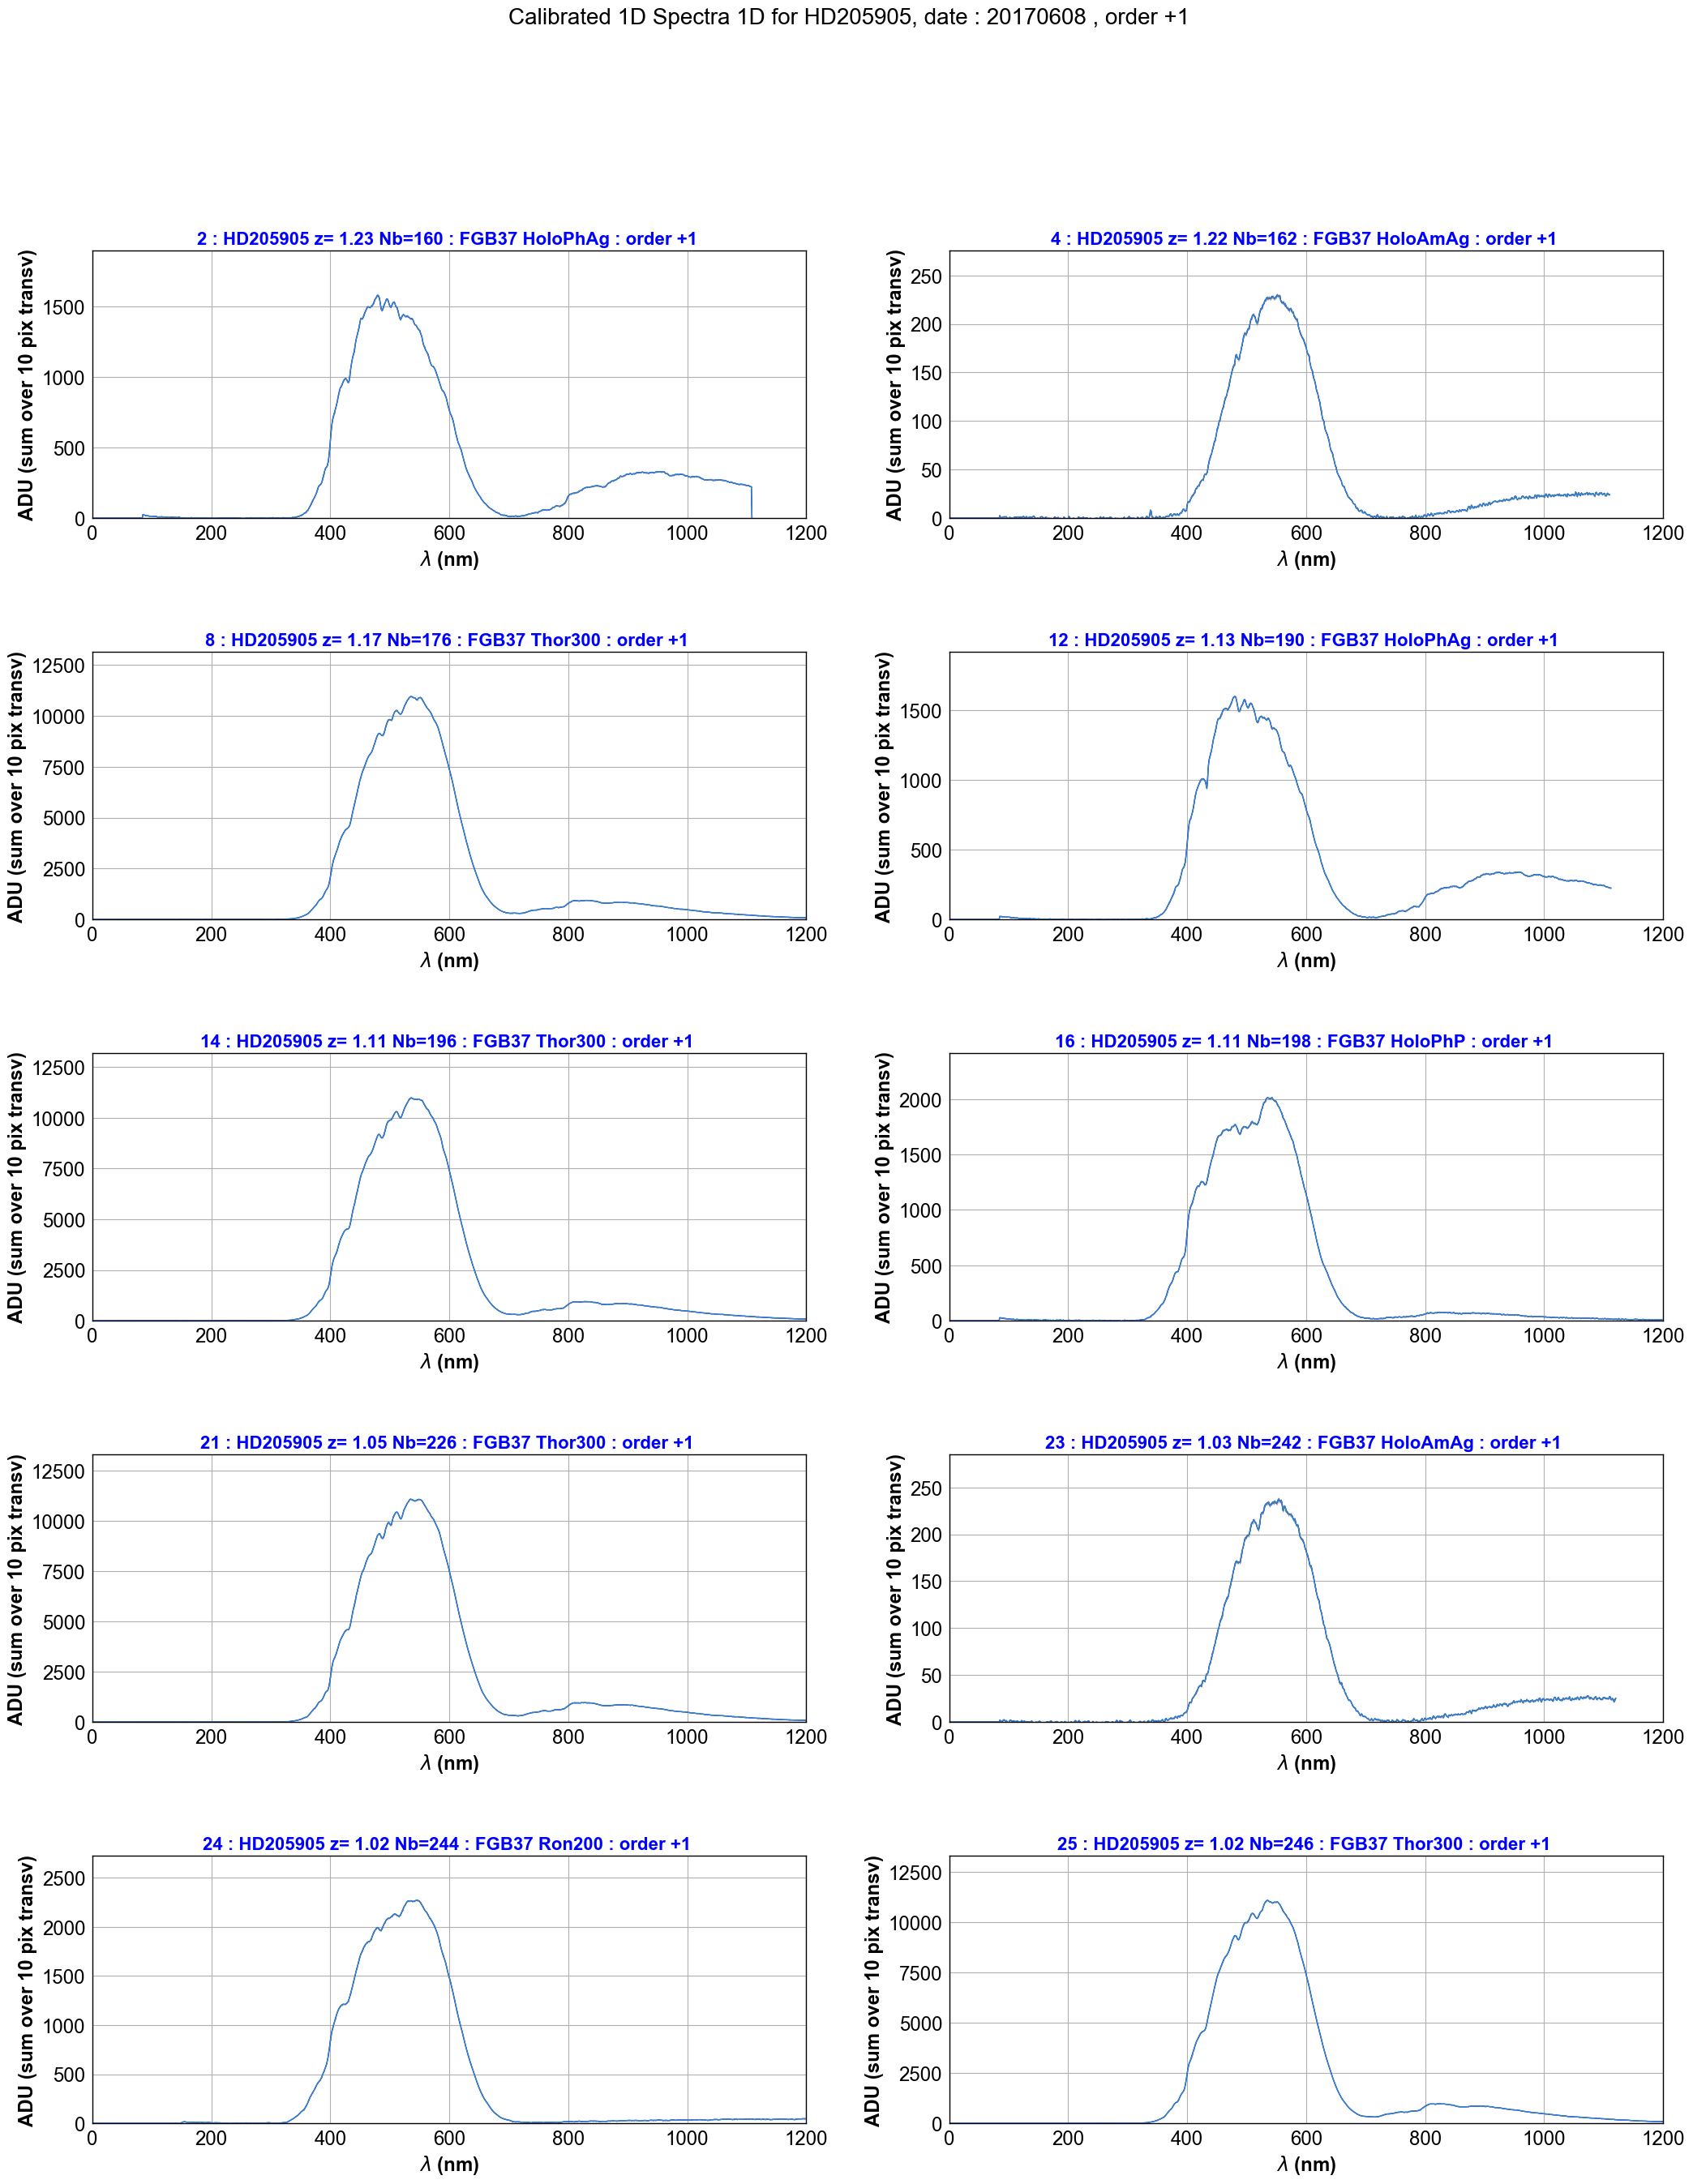

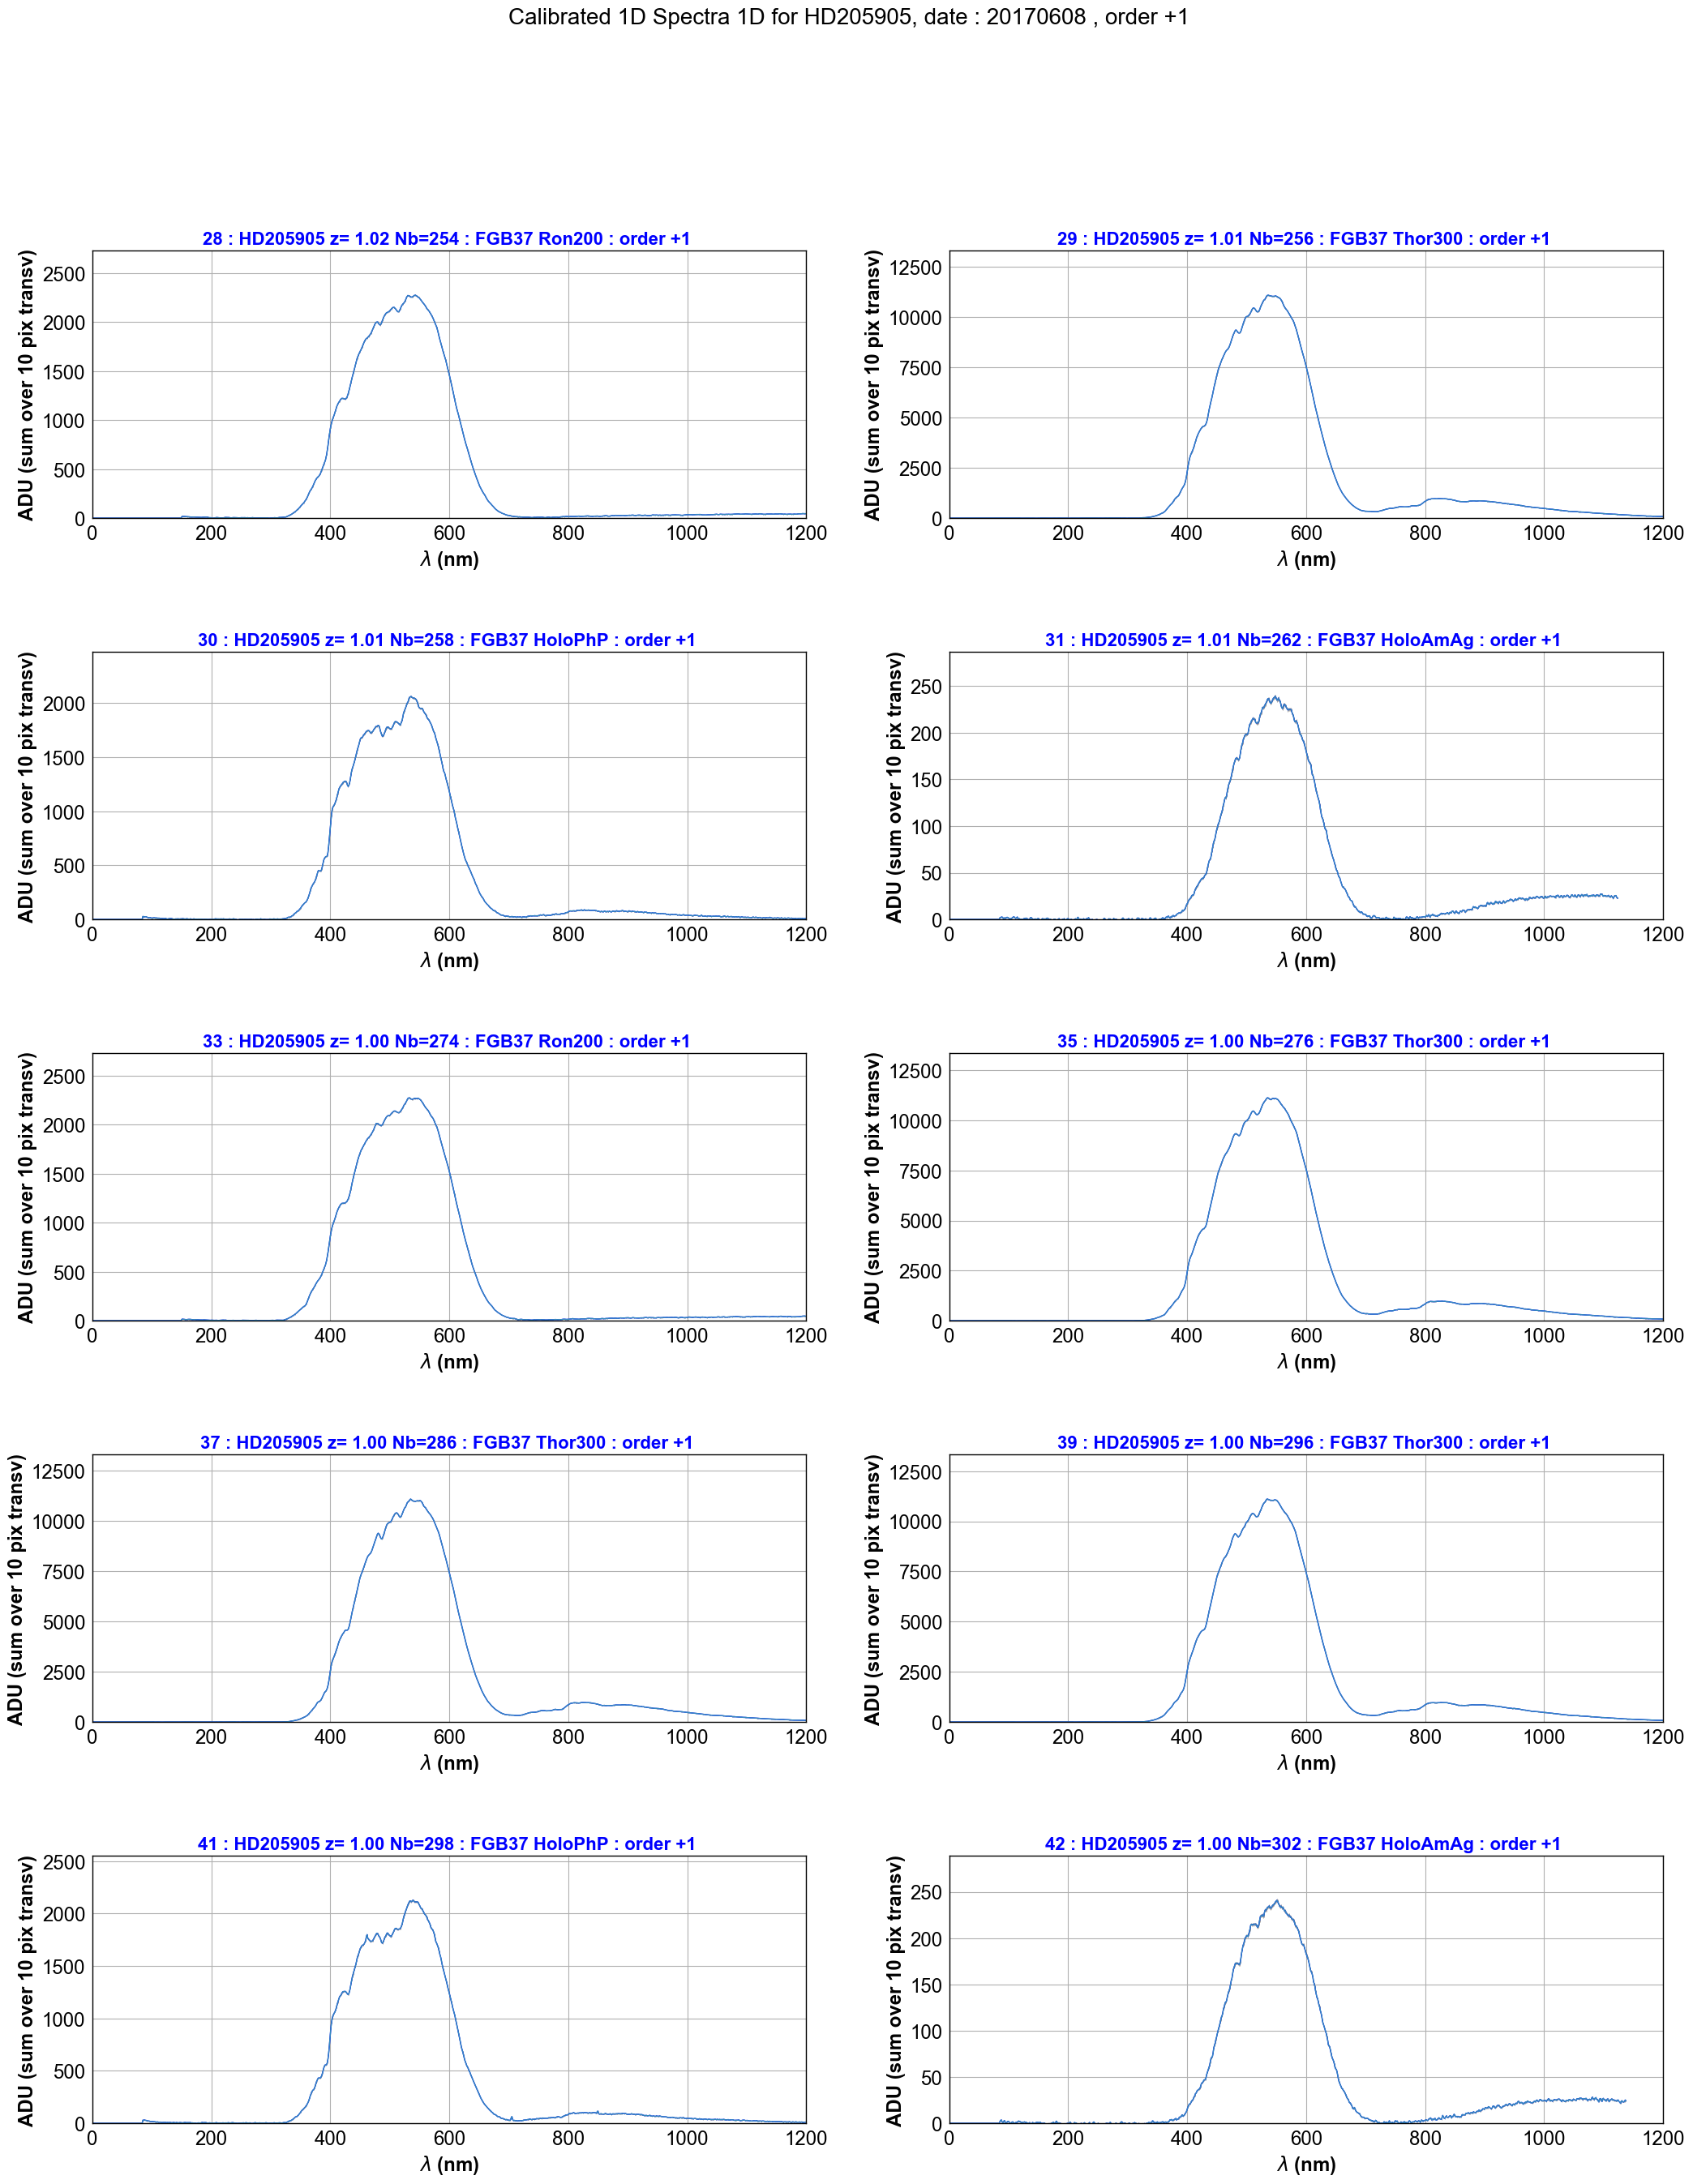

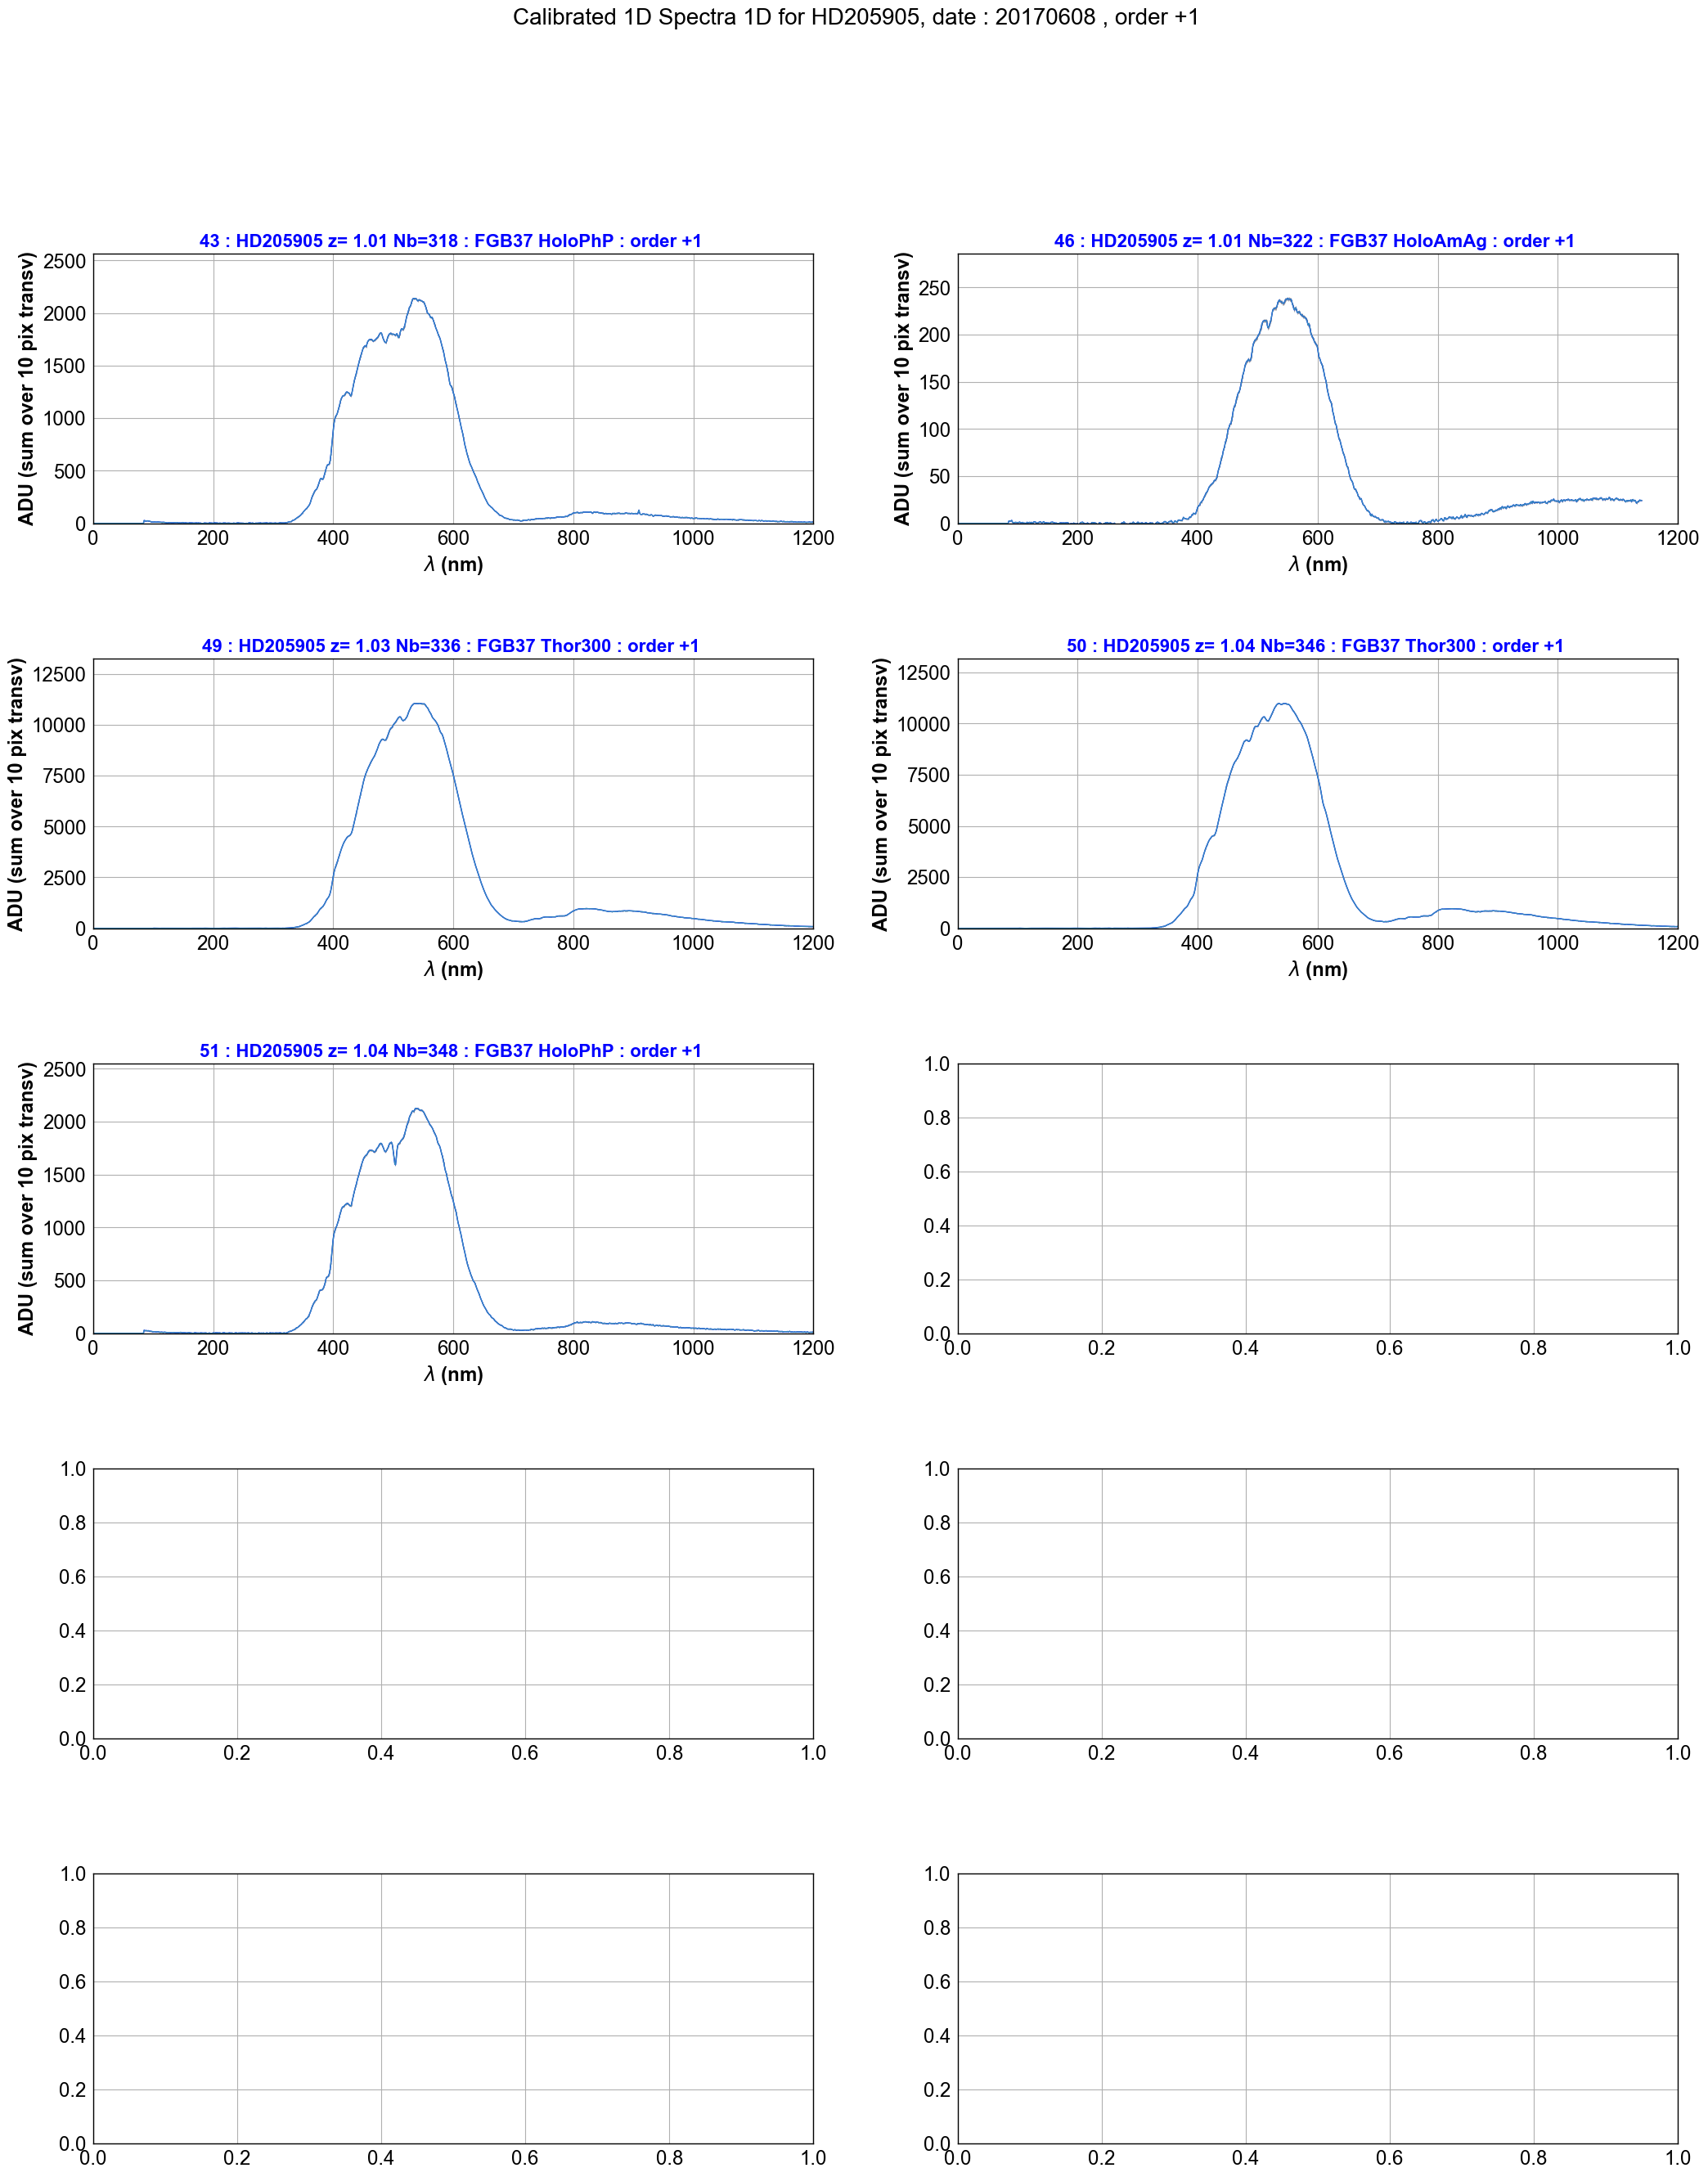

In [42]:
ShowCalibSpectrainPDFSelect(all_rightspectra_data,all_rightspectra_data_stat_err,all_rightspectra_wl,all_titles,object_name,dir_top_images,all_filt,all_filt1,all_filt2,date,'calib1DspectraSel_right.pdf','order +1')

# To study contamination by order 2 ==> Select FGB37 Filter data

## Find the indexes with tag FGB37

In [87]:
all_filt1=np.array(all_filt1)
Selected_Indexes=np.where(all_filt1=='FGB37')[0]

In [88]:
Selected_Indexes

array([ 2,  4,  8, 12, 14, 16, 21, 23, 24, 25, 28, 29, 30, 31, 33, 35, 37,
       39, 41, 42, 43, 46, 49, 50, 51])

## Remember the corresponding filters and disperser

In [89]:
all_filt2=np.array(all_filt2)
Selected_Dispersers=all_filt2[Selected_Indexes]

In [90]:
Selected_Dispersers

array(['HoloPhAg', 'HoloAmAg', 'Thor300', 'HoloPhAg', 'Thor300', 'HoloPhP',
       'Thor300', 'HoloAmAg', 'Ron200', 'Thor300', 'Ron200', 'Thor300',
       'HoloPhP', 'HoloAmAg', 'Ron200', 'Thor300', 'Thor300', 'Thor300',
       'HoloPhP', 'HoloAmAg', 'HoloPhP', 'HoloAmAg', 'Thor300', 'Thor300',
       'HoloPhP'], 
      dtype='|S8')

In [175]:
all_filt=np.array(all_filt)
Select_Filt=all_filt[Selected_Indexes]

## Build X, Y and interpolation function

In [92]:
all_interpolate = [] # interpolation functions
all_spc= []          # spectrum
lambdas=np.linspace(300.,1100.,800) # spectrum wavelength domain
for idx in Selected_Indexes:
    index=idx
    # define (x,y)    
    x=all_rightspectra_wl[index]
    y=all_rightspectra_data[index]
    # interpolation function y = f(x)
    f = interpolate.interp1d(x, y)
    # calculate y=f(x), where x are the tabulated lambdas
    spc=f(lambdas)
    # save in container
    all_interpolate.append(f)
    all_spc.append(spc)

### Check the interpolation

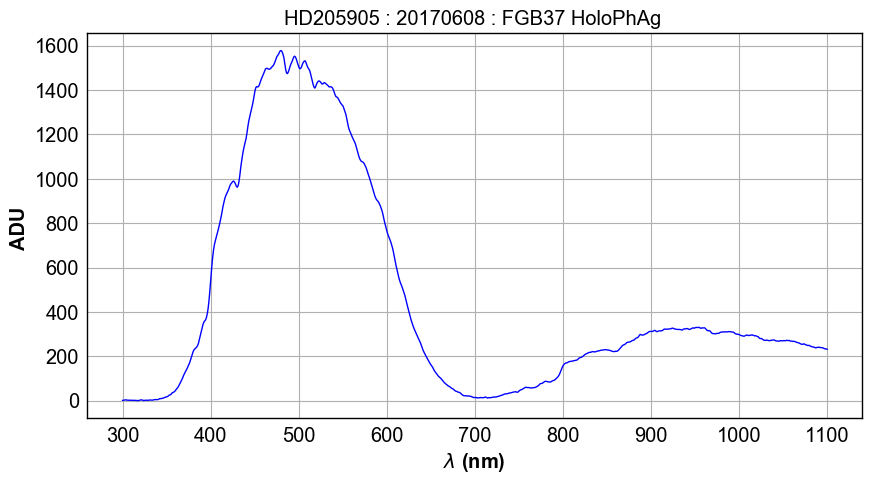

In [188]:
sel=0
title="{} : {} : {} ".format(object_name,date,Select_Filt[sel])
plt.title(title)
plt.plot(lambdas,all_spc[sel],'b-')
plt.xlabel("$\lambda$ (nm) ")
plt.ylabel("ADU ")

In [189]:
from IPython.display import Latex

# Compute the ratio 


$$
\begin{equation}
Y = \frac{Y(\lambda)}{Y(\lambda / 2)}
\end{equation}
$$

In [138]:
def GiveContamination(wavelength,spectrum,interpol_f):
    """
    Compute contamination
    
    input:
        - wavelength : array of wavelength
        - spectrum   : spectrum
        - interpol_f : interpolation function
    """
    X=wavelength # range 300 nm - 1100 nm
    XMIN=np.min(X)
    XMAX=np.max(X)
    Yfullscale=spectrum
    
    Xhalf=X/2.  # range 150 nm - 550 nm
    #find indexes which are in the range XMIN-XMAX
    sel_index=np.where(np.logical_and(Xhalf>=XMIN,Xhalf<=XMAX))[0] # half must be in wl domain
    
    wl_sel=X[sel_index]
    
    Xcut=X[sel_index]
    Ycut=Yfullscale[sel_index]
    Xhalf_cut=Xhalf[sel_index]  # wavelength lambdas/2 in the wl domain
    Yhalf_cut=interpol_f(Xhalf_cut)  # interpolate the spectrum at half lambda
    ratio= Ycut/Yhalf_cut
    return wl_sel,ratio    

In [178]:
def PlotContamination(wavelength,spectrum,interpol_f,grating_name):
    wl,r=GiveContamination(wavelength,spectrum,interpol_f)
    thetitle=grating_name
    
    plt.figure(figsize=(10,5))
    plt.title(thetitle)
    plt.plot(wl,r,'b-',lw=2)
    plt.xlim(650.,1100.)
    plt.ylim(0.,0.5)
    plt.xlabel("$\lambda$ (nm)")
    plt.ylabel("Y($\lambda$)/Y($\lambda$/2)")

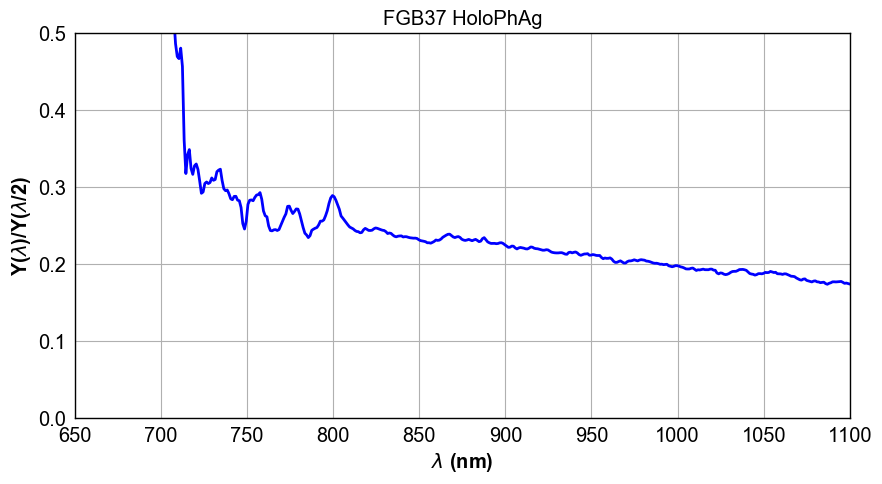

In [183]:
PlotContamination(lambdas,all_spc[sel],all_interpolate[sel],Select_Filt[sel]) 

# Loop

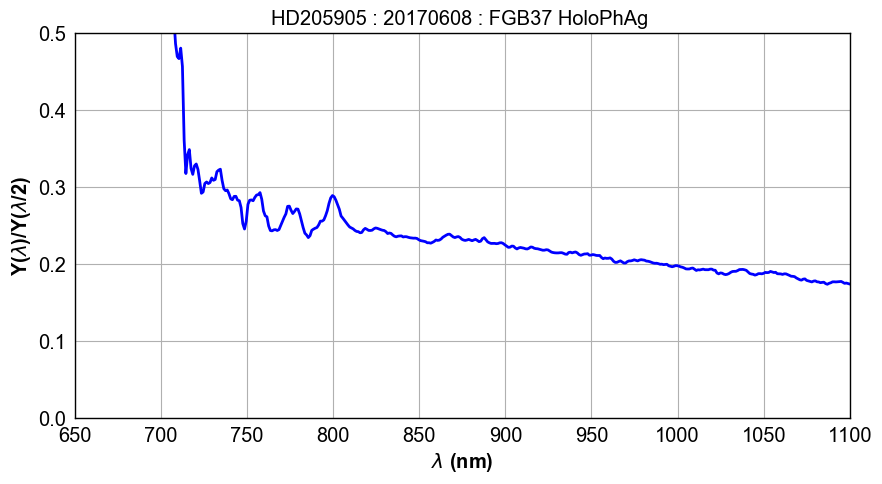

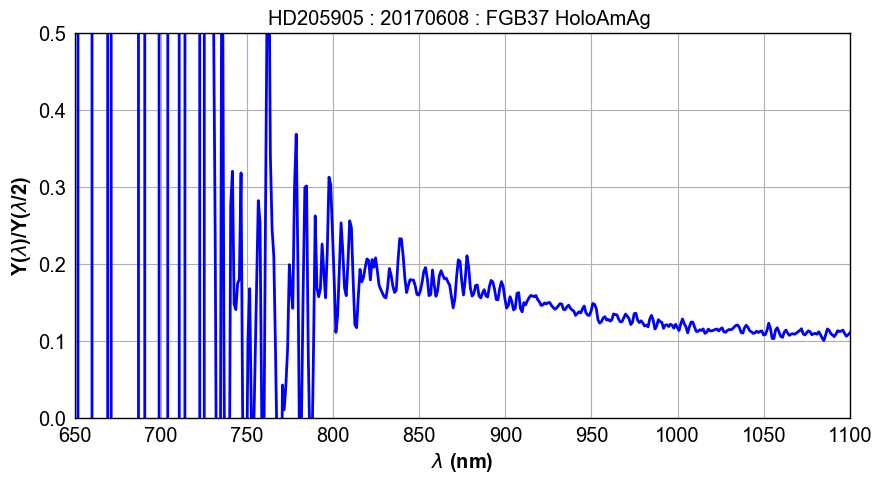

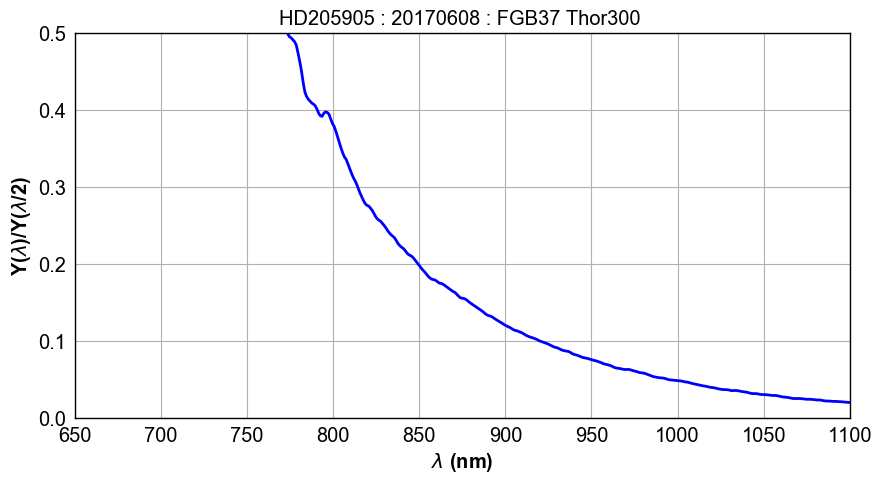

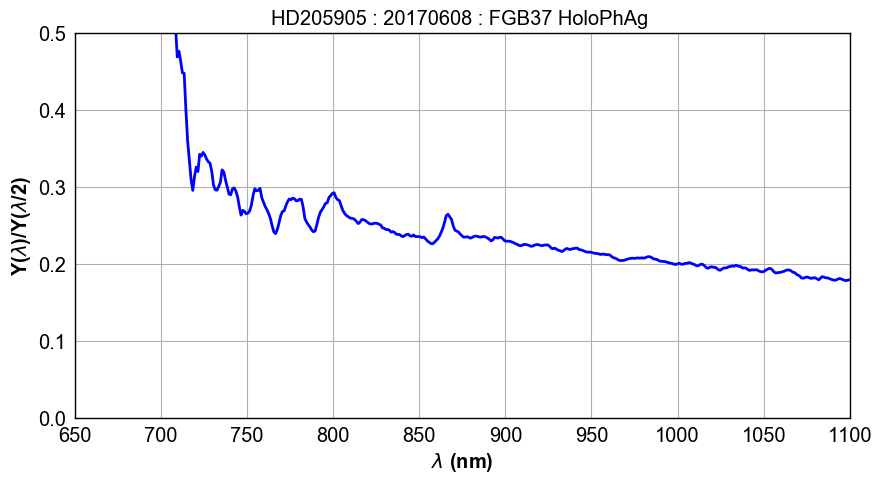

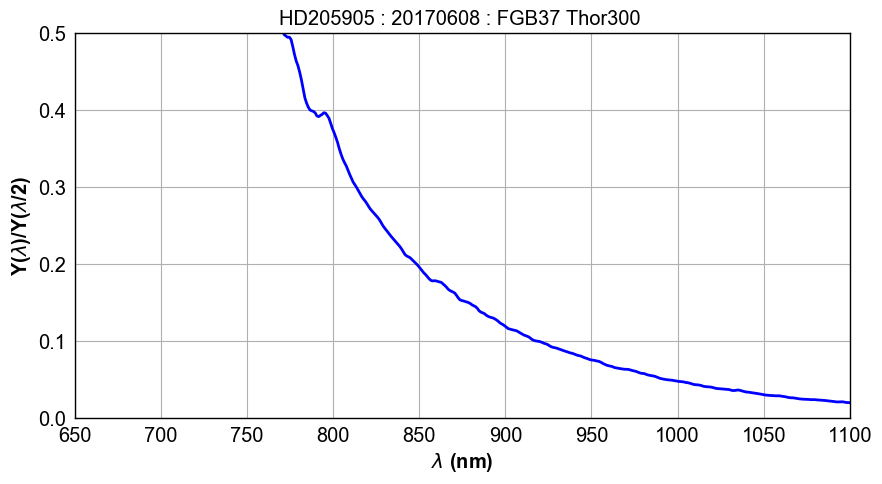

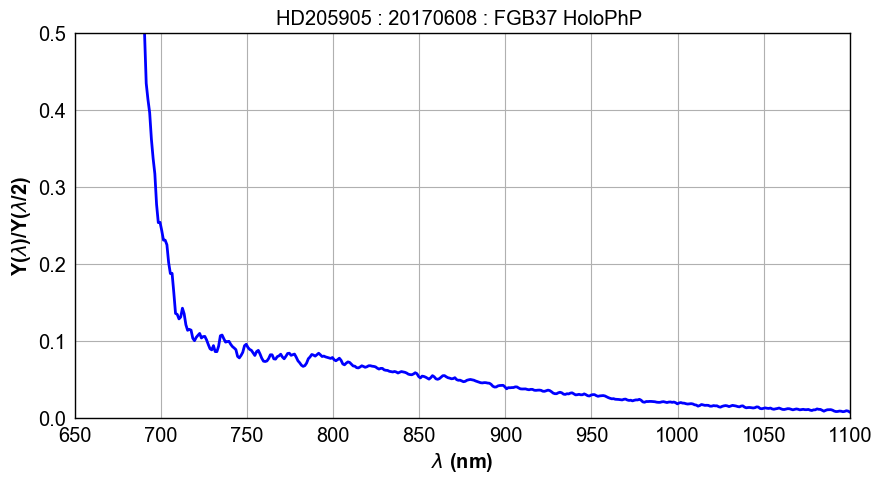

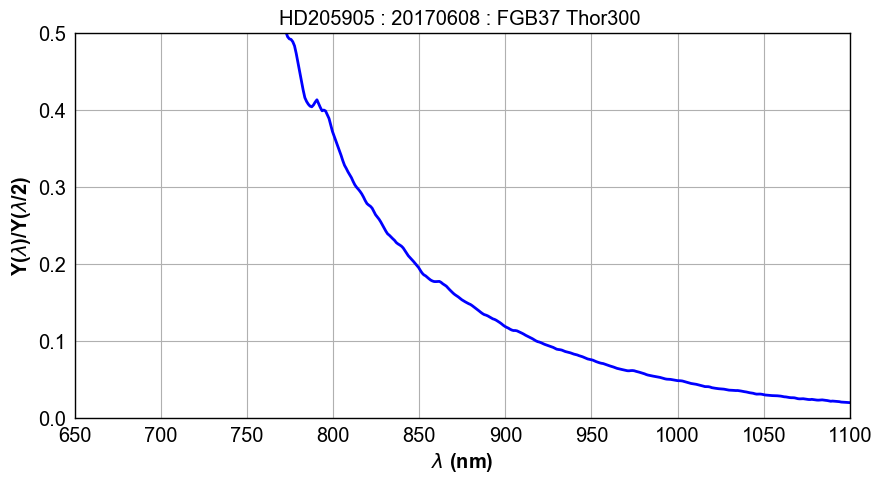

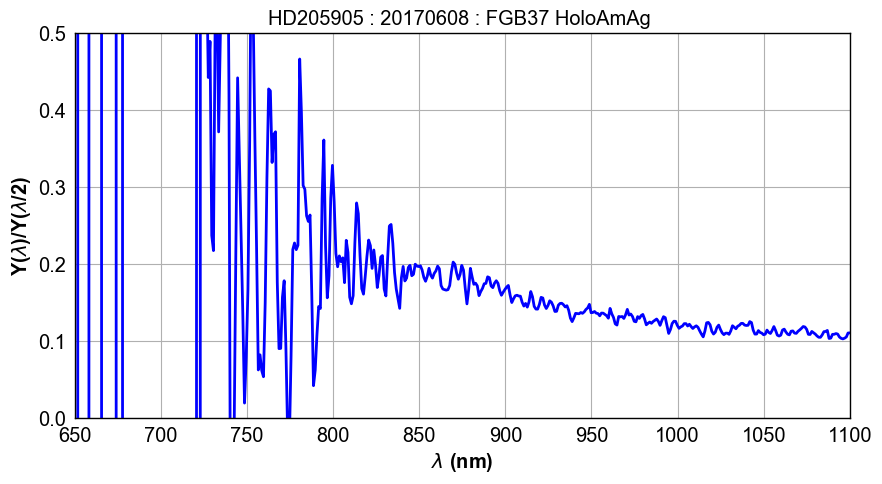

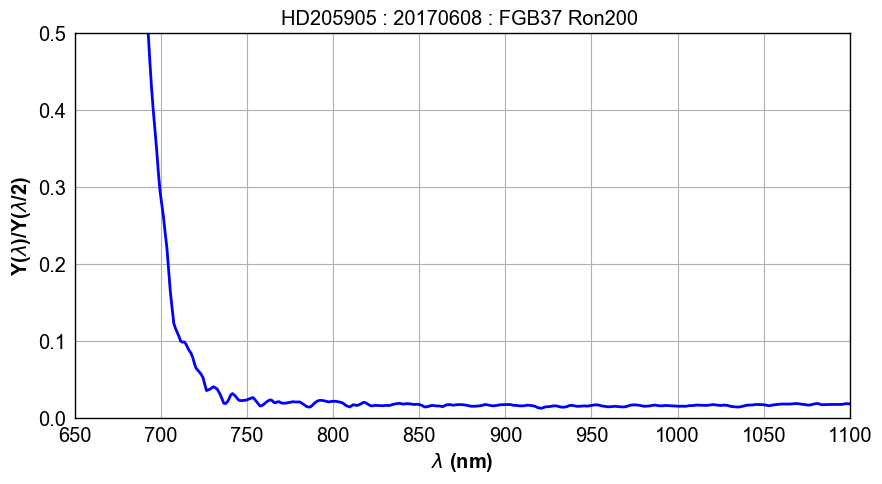

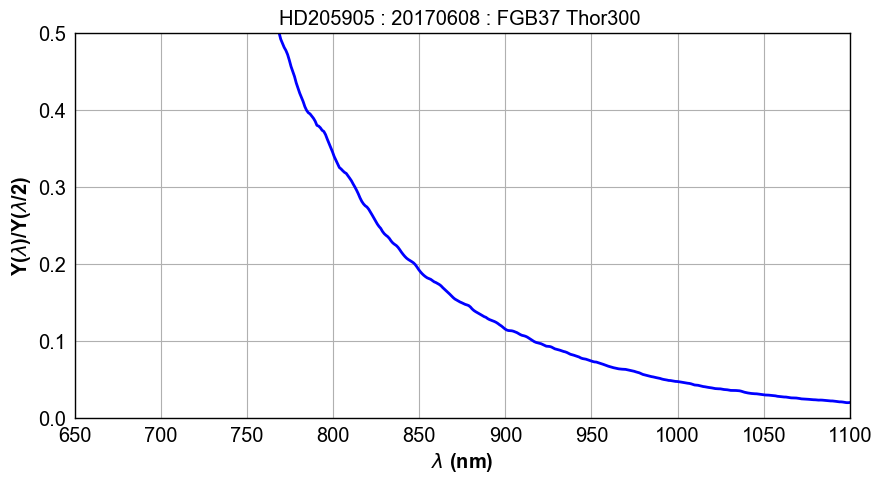

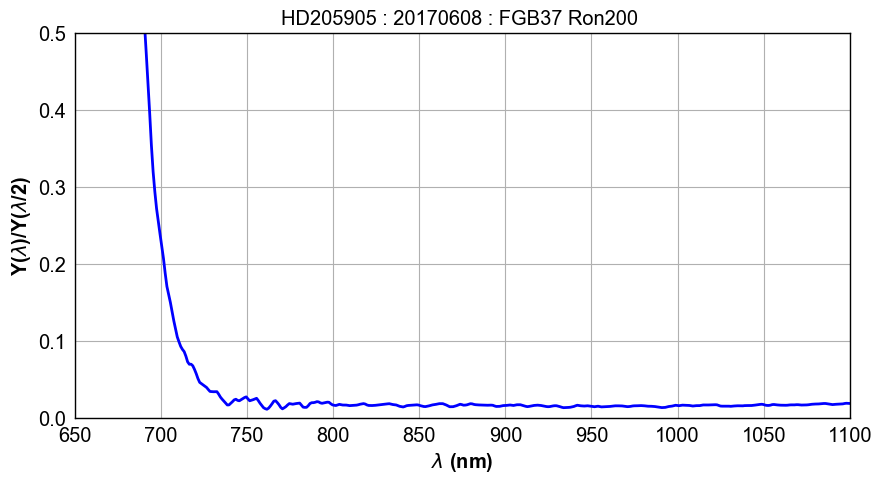

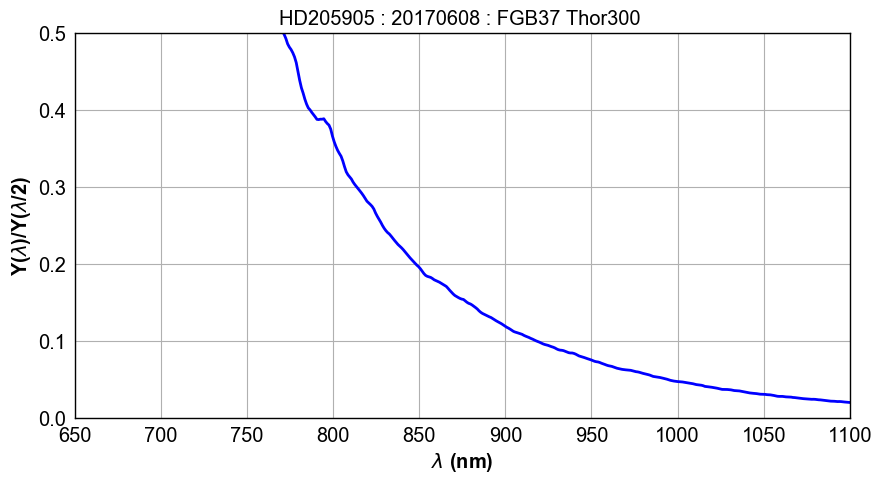

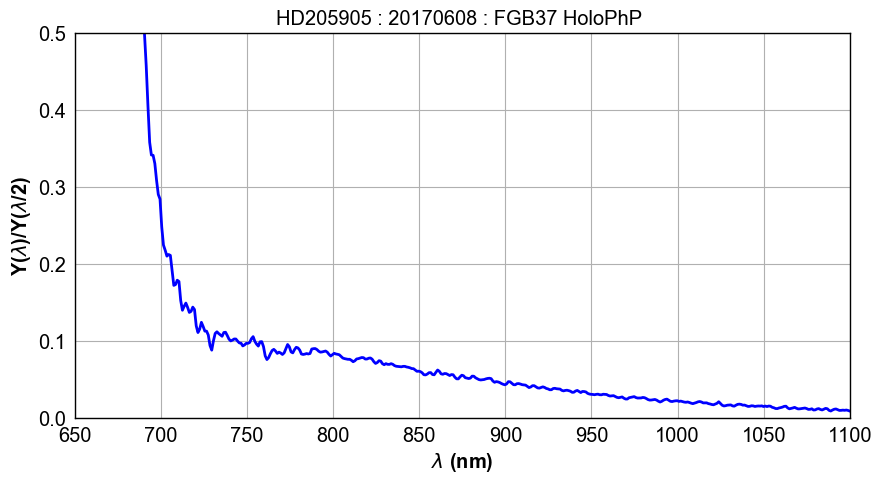

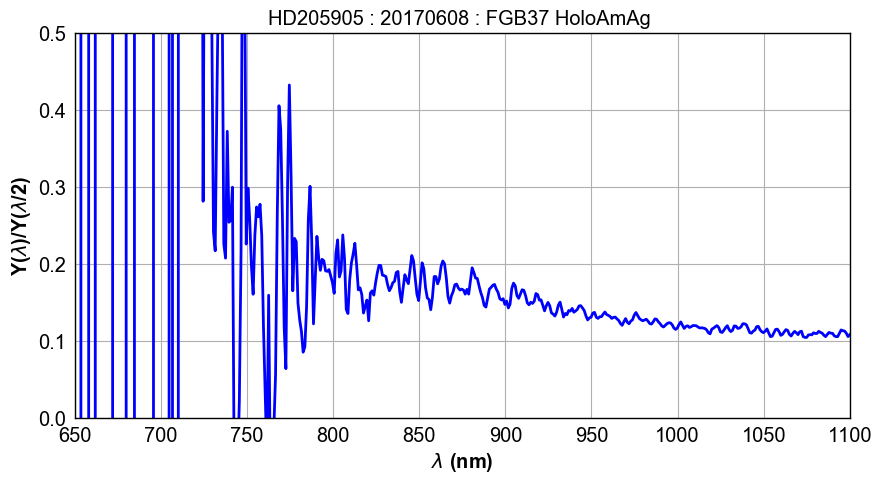

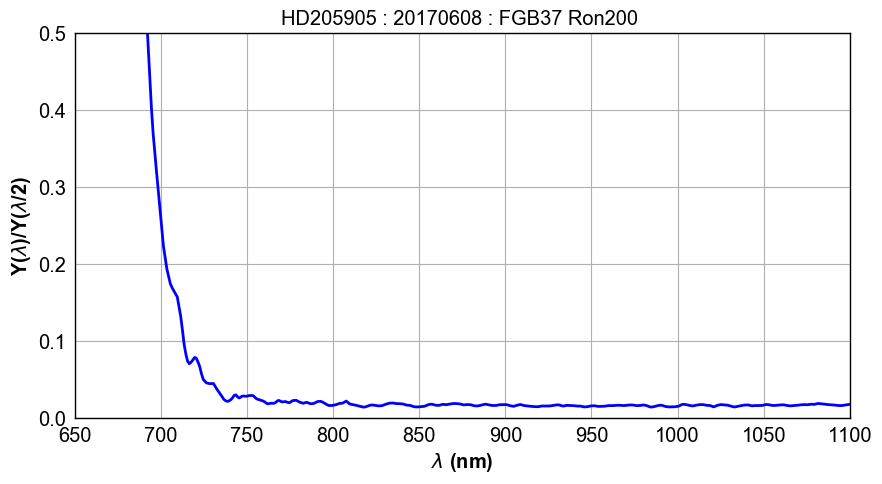

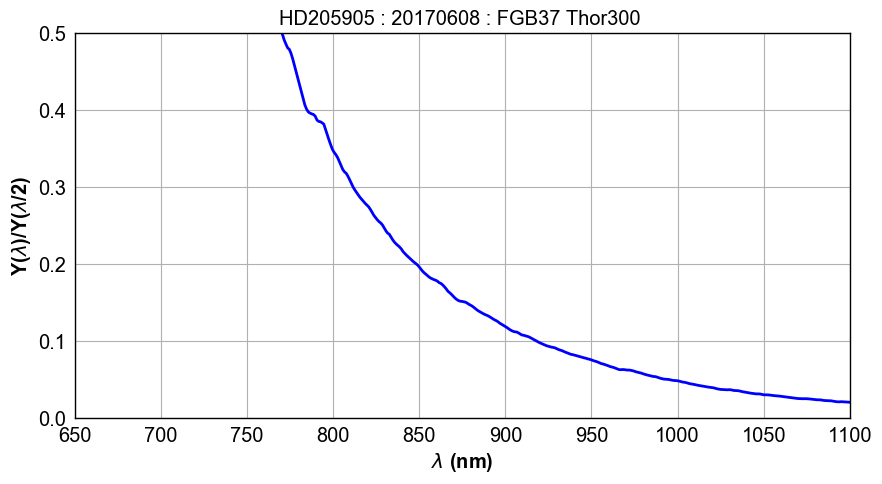

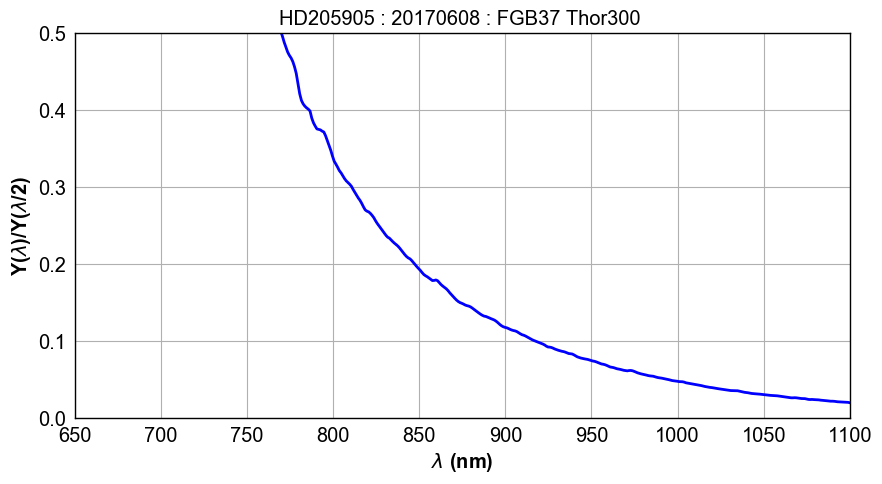

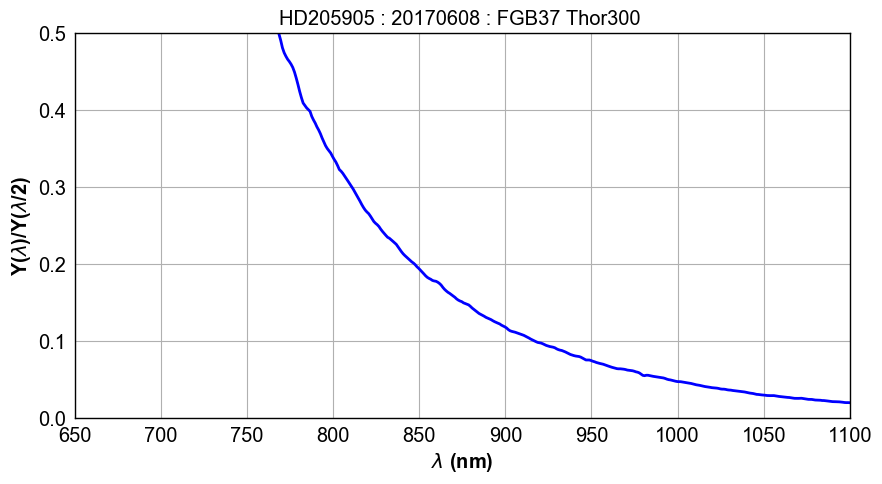

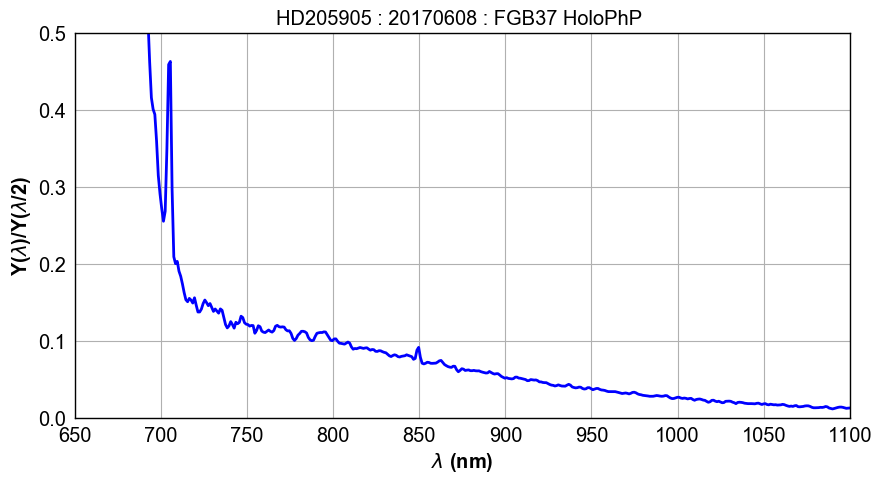

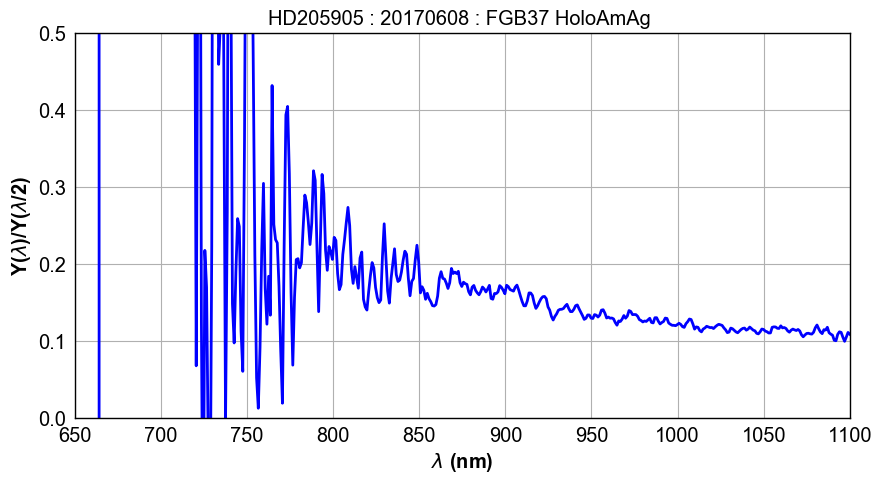

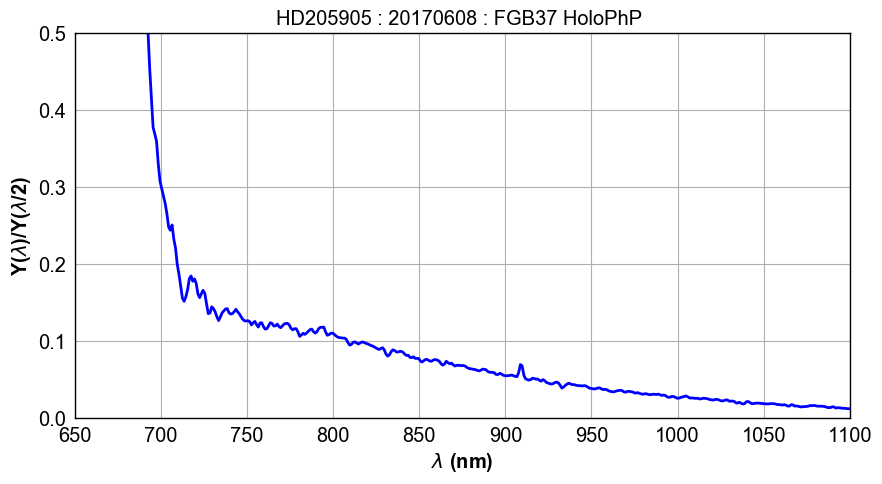

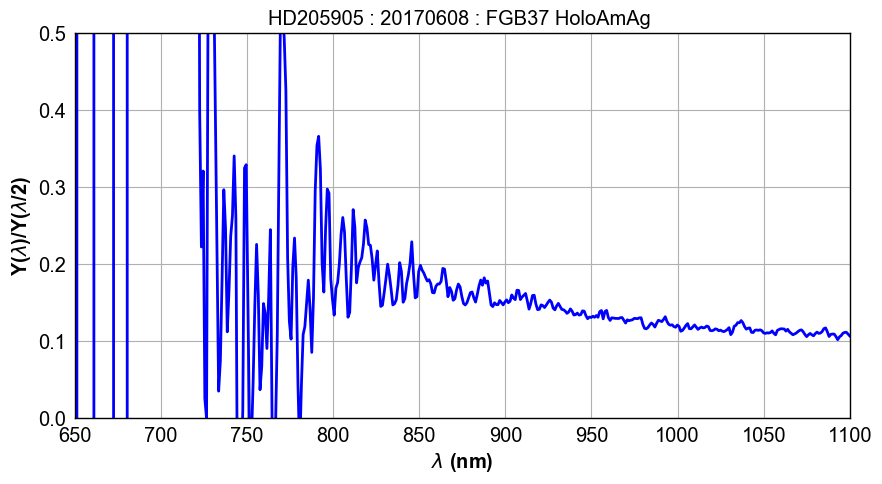

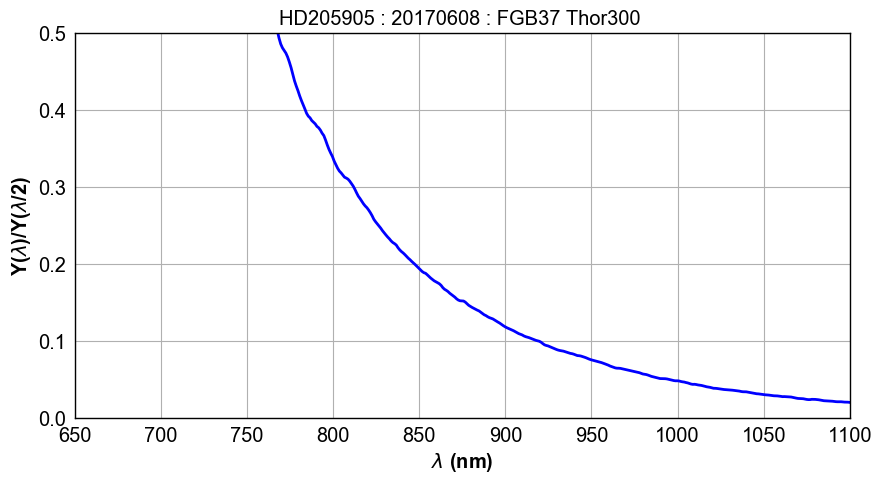

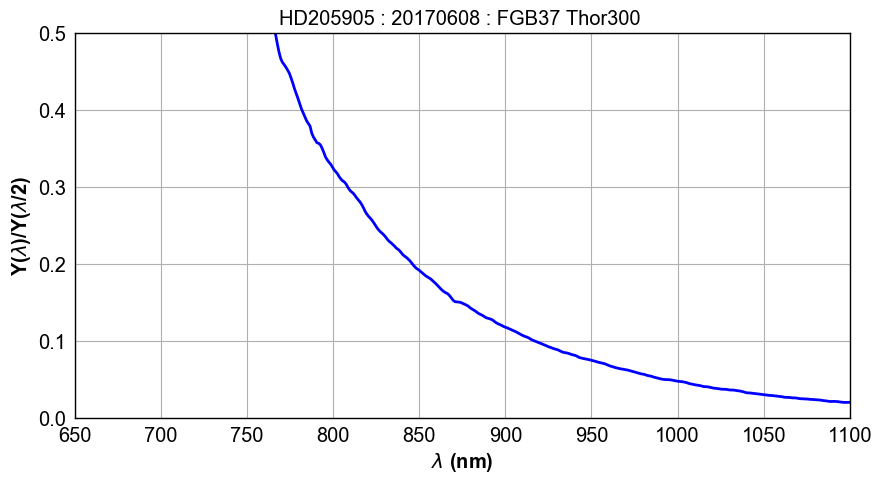

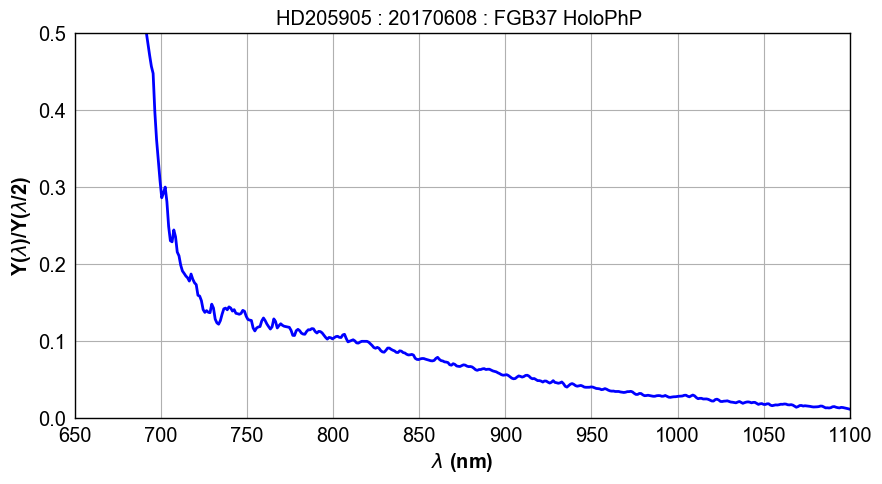

In [181]:
for sel in np.arange(len(Selected_Indexes)):
    title="{} : {} : {} ".format(object_name,date,Select_Filt[sel])
    PlotContamination(lambdas,all_spc[sel],all_interpolate[sel],title) 